********************************************************************************** <br>
** Final Project - DSC530-301 Data Exploration and Analysis <br>
** Author - Sheetal Munjewar <br>
** Submission Date - 06/02/2023 <br>
********************************************************************************** <br>


| Index     | Table of contents                                         |
| :---      |    ----:                                                  |
| 1.1		| Libraries Import 											| 
| 1.2		| Python Pandas and Matplot libraries Configurations		|
| 1.3		| Sudo code to read yaml files 								|
| 1.4		| Extract data files and data consolidation 				|
| 1.5		| Introduce new columns 									|
| 1.6		| Creating Dataframes For Match, Batsman and Innings  		|
| 1.7		| Batsman Statistics 										|
| 1.8		| Batsman Season Statistics 								|
| 1.9		| Plot Inning Histogram/Match 								|	
| 2.0		| Dealing with Outliers - Innings Outliers 					|
| 2.1		| Dealing with Outliers - Remove Outlier No-Results			|
| 2.2		| Scatter-Plot - Inning Scores Over the Seasons 			|
| 2.3		| Average Scores Over the Seasons for Chennai Super Kings 	|	
| 2.4		| Average Scores Over the Seasons for Others 				|				
| 2.5		| Discrete scenarios to compare CSK Innings Scores with Other Teams using PMF()|
| 2.6		| Cumulative scenarios to compare CSK Innings Scores with Other Teams using CDF() |
| 2.7		| Normal Distribution Between CSK and Others using CDF() 					|
| 2.8		| Scatter-Plot - Opening Baters Contribution Towards Total Score 			|
| 2.9		| Scatter-Plot - Powerplay Impact for First Six Overs Score  				|
| 3.0		| Scatter-Plot - Powerplay Impact for First Six Overs Score 				|
| 4.1		| Scatter-Plot - Runs Conceded During First Five Overs  					|
| 4.2		| Scatter-Plot - Runs Conceded During Last Five Overs  						|
| 4.3		| Hypothesis Test - About King Kholi Innings 								|
| 4.4		| Regression Test - Logistic Regression 									|			
| 4.5		| Fitting model 															|
| 4.6		| Model Accuracy with entire and split dataset 								|
| 4.7		| Plot Histogram for Number of Matches Per Season							|
| 4.8		| Plot Histogram for Number of Match Locations 								|
| 4.9		| Plot Histogram for Toss  													|
| 5.0		| Plot Histogram for Match Winners 											|
| 5.1		| Plot Histogram for Man of the Match 										|
| 5.2		| Plot Histogram for Centuries by Players 									|
| 5.3		| Plot Histogram for Half Centuries by Players 								|
| 5.4		| Plot Histogram for Batsman Strike Rate 									|
|

## Libraries Import<a class="anchor" id="Import-Libraries"></a>


In [1]:
import csv
import sys
import time

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import yaml


# ipl_classes: Module for classes to convert match yaml files into consolidated data frame
# func_pmfcdf: Module to calculate PMF and CDF
# categorical_corelation: Module to find correlation with categorical variables
# hypothesis_test: Module to test null hypothesis
from IPL_Functions import categorical_corelation as func_ccorelation
from IPL_Functions import hypothesis_test as func_hypo_test
from IPL_Functions import ipl_classes, func_pmfcdf
from IPL_Functions import yaml_utilities as func_yamlutl
from IPL_Functions import zip_utilities as func_ziputl

%matplotlib inline
from IPython.display import set_matplotlib_formats
from scipy import stats as scistats


## Python Pandas and Matplot libraries Configurations <a class="anchor" id="configurations"></a>


In [2]:
pd.set_option("display.max_rows", 5000)
pd.set_option("display.max_columns", 10)
pd.set_option("display.width", None)

set_matplotlib_formats("png", "pdf")
plt.style.use(
    "fivethirtyeight"
    #     "seaborn-darkgrid"
)  # fivethirtyeight,ggplot,seaborn-darkgrid,seaborn-whitegrid
plt.rcParams["figure.figsize"] = [24, 12]

C:\Users\munje\AppData\Local\Temp\ipykernel_22336\3216448813.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("png", "pdf")


## Sudo code to read yaml files <a class="anchor" id="Read-Yaml-File"></a>
Test Yaml File Reading

In [3]:
yamlIn = open("335982.yaml", "r")  # first match
yamlFile = yaml.load(yamlIn, Loader=yaml.FullLoader)
tempDf = func_yamlutl.readYamlToDataFrame(1, yamlFile)
tempDf.head()
tempDf.columns
# # iterating the columns
# for col in data.columns:
#     print(col)
tempGroupByInnings = tempDf.groupby(by=["MatchId", "InningNo"])
tempTeamsTotalRuns = tempGroupByInnings["TotalRuns"].sum()

## Extract data files and data consolidation <a class="anchor" id="Unzip-Dataset-Files"></a>
        -- Unzip dataset files.
        -- Consoldiate them into one dataframe. 
        -- Introduce dummy columns.

In [4]:
df = func_ziputl.extractZipAndProcess("ipl.zip")
df.to_csv("all-records.csv", index=False)
# df = pd.read_csv("all-records.csv")

Done processing in 48.58889400000044 seconds


In [5]:
print("Print sample last 5 records", df.tail())
# df.to_csv('all-records.csv', index=False)
print("Shape", df.shape)
print("Columns", df.columns)

Print sample last 5 records         MatchId        Date       City           Team1                Team2  \
179053      756  2019-05-12  Hyderabad  Mumbai Indians  Chennai Super Kings   
179054      756  2019-05-12  Hyderabad  Mumbai Indians  Chennai Super Kings   
179055      756  2019-05-12  Hyderabad  Mumbai Indians  Chennai Super Kings   
179056      756  2019-05-12  Hyderabad  Mumbai Indians  Chennai Super Kings   
179057      756  2019-05-12  Hyderabad  Mumbai Indians  Chennai Super Kings   

        ...      Bowler NonStriker RunsBat RunsExtras  TotalRuns  
179053  ...  SL Malinga  SR Watson       1          0          1  
179054  ...  SL Malinga  RA Jadeja       2          0          2  
179055  ...  SL Malinga  RA Jadeja       1          0          1  
179056  ...  SL Malinga  RA Jadeja       2          0          2  
179057  ...  SL Malinga  RA Jadeja       0          0          0  

[5 rows x 22 columns]
Shape (179058, 22)
Columns Index(['MatchId', 'Date', 'City', 'Team1', 'T

## Introduce new columns <a class="anchor" id="Add-Dummy-Columns"></a>
        -- Introducing new columns.
        -- Data correction

In [6]:
# added Column Season with Year of match
df["IPL_Season"] = pd.DatetimeIndex(df["Date"]).year
# replace Bangalore with Bengaluru
df.City.replace("Bangalore", "Bengaluru", inplace=True)
df.ManOfTheMatch.fillna("-", inplace=True)

In [7]:
df["Fours"] = df["RunsBat"] == 4
df["Sixes"] = df["RunsBat"] == 6
groupByInnings = df.groupby(by=["MatchId", "InningNo"])
teamsTotalRuns = groupByInnings["TotalRuns"].sum()
boundriesPerInnings = groupByInnings["Fours"].sum() + groupByInnings["Sixes"].sum()

In [8]:
ballsFirst6Overs = df[df["BallNo"] < 6]
ballsLast5vers = df[df["BallNo"] > 15]
grpByInningFirst6 = ballsFirst6Overs.groupby(by=["MatchId", "InningNo"])
grpByInningLast5 = ballsLast5vers.groupby(by=["MatchId", "InningNo"])

firstSixOversTotal = grpByInningFirst6["TotalRuns"].sum()
lastFiveOvers = grpByInningLast5["TotalRuns"].sum()

##  Creating Dataframes For Match, Batsman and Innings  <a class="anchor" id="Dataframe-For-Match"></a>


**Individual innings Information and following columns must be used for analysis.** </br> 
>   --opener1Runs <br>
    --opener2Runs <br>
    --OpenersTotalRuns <br>
    --teamTotal <br>
    --boundries <br>
    --firstSixTotal <br>
    --lastFiveTotal <br>
    --boundriesGiven <br>
    --firstSixTotalGiven <br>
    --lastFiveTotalGiven <br>
    --oppisitionTotalRuns <br>
    --Won <br>
    --Chasing <br>
    --WonToss <br>


In [9]:
matchinfo = df.groupby(by=["MatchId"])
dfMatchInfo = matchinfo.head(n=1)
dfMatchInfo.shape

(756, 25)

In [10]:
df_batsman = pd.DataFrame.copy(df)
df_batsman = df.groupby(by=["MatchId", "InningNo", "Batsman"])
runsByBatsmanPermatch = df_batsman.agg({"RunsBat": "sum", "BallNo": "count"})

In [11]:
def getLocatedValue(dfToLocate, matchId, innings):
    result = 0
    try:
        result = dfToLocate.loc[matchId, innings]
    except KeyError:
        result = 0
    return result

In [12]:
inningsInfo = groupByInnings.head(n=1)
print(inningsInfo.shape)
d = {"runsOpener1": [], "runsOpener2": []}
runsForOpener = pd.DataFrame(data=d)
for index, row in inningsInfo.iterrows():
    try:
        opener1Runs = runsByBatsmanPermatch.loc[
            row["MatchId"], row["InningNo"], row["Opener1"]
        ]["RunsBat"]
        opener2Runs = runsByBatsmanPermatch.loc[
            row["MatchId"], row["InningNo"], row["Opener2"]
        ]["RunsBat"]

    except KeyError:
        opener1Runs = 0
        opener2Runs = 0

    teamTotal = getLocatedValue(teamsTotalRuns, row["MatchId"], row["InningNo"])
    boundries = getLocatedValue(boundriesPerInnings, row["MatchId"], row["InningNo"])
    firstSixTotal = getLocatedValue(firstSixOversTotal, row["MatchId"], row["InningNo"])
    lastFiveTotal = getLocatedValue(lastFiveOvers, row["MatchId"], row["InningNo"])

    if row["InningNo"] % 2 == 0:
        oppInnings = row["InningNo"] - 1
    else:
        oppInnings = row["InningNo"] + 1

    boundriesGiven = getLocatedValue(boundriesPerInnings, row["MatchId"], oppInnings)
    firstSixTotalGiven = getLocatedValue(firstSixOversTotal, row["MatchId"], oppInnings)
    lastFiveTotalGiven = getLocatedValue(lastFiveOvers, row["MatchId"], oppInnings)

    oppisitionTotalRuns = getLocatedValue(teamsTotalRuns, row["MatchId"], oppInnings)

    if row["BattingTeam"] == row["Team1"]:
        opposition = row["Team2"]
    else:
        opposition = row["Team1"]

    d = {
        "runsOpener1": [opener1Runs],
        "runsOpener2": [opener2Runs],
        "teamTotalRuns": [teamTotal],
        "opposition": [opposition],
        "boundries": [boundries],
        "firstSixTotal": [firstSixTotal],
        "lastFiveTotal": [lastFiveTotal],
        "boundriesGiven": [boundriesGiven],
        "firstSixTotalGiven": [firstSixTotalGiven],
        "lastFiveTotalGiven": [lastFiveTotalGiven],
        "oppisitionTotalRuns": [oppisitionTotalRuns],
    }
    runsForOpenerTemp = pd.DataFrame(data=d)
    runsForOpener = pd.concat([runsForOpener, runsForOpenerTemp], ignore_index=True)

inningsInfo.reset_index(inplace=True)

inningsInfo = pd.concat([inningsInfo, runsForOpener], axis=1)
inningsInfo.reset_index(inplace=True)
# inningsInfo.join(runsForOpener)


# inningsInfo.shape

(1528, 25)


In [13]:
inningsInfo["Won"] = inningsInfo["Winner"] == inningsInfo["BattingTeam"]
inningsInfo["Chasing"] = inningsInfo["InningNo"] % 2 == 0
inningsInfo["WonToss"] = inningsInfo["TossWinner"] == inningsInfo["BattingTeam"]
inningsInfo["OpenersTotalRuns"] = (
    inningsInfo["runsOpener1"] + inningsInfo["runsOpener2"]
)
inningsInfo.head(5)

,level_0,index,MatchId,Date,City,...,oppisitionTotalRuns,Won,Chasing,WonToss,OpenersTotalRuns
0,0,0,1,2008-04-18,Bengaluru,...,82.0,True,False,False,168.0
1,1,124,1,2008-04-18,Bengaluru,...,222.0,False,True,True,8.0
2,2,225,2,2008-04-19,Chandigarh,...,207.0,True,False,True,40.0
3,3,349,2,2008-04-19,Chandigarh,...,240.0,False,True,False,95.0
4,4,473,3,2008-04-19,Delhi,...,132.0,False,False,True,17.0


## Batsman Statistics<a class="anchor" id="DataFrame-Batsman-Info-Per-Match"></a>
>   -- MatchId <br>
    -- InningNo <br>
    -- Team <br>
    -- TotalRuns <br>
    -- Opposition <br>
    -- ManOfTheMatch <br>
    -- Season <br>
    -- TeamTotalRuns <br>
    -- City <br>
    -- Won <br>
    -- Chasing <br>
    -- Century <br>
    -- HalfCentury <br>
    -- Balls <br>

In [14]:
batsmanPerMatch = pd.DataFrame()
for index in runsByBatsmanPermatch.index:
    inning = inningsInfo.loc[
        (inningsInfo["MatchId"] == index[0]) & (inningsInfo["InningNo"] == index[1])
    ]
    batsmanTotal = runsByBatsmanPermatch.loc[index[0], index[1], index[2]]
    batsmanRun = batsmanTotal["RunsBat"]
    balls = batsmanTotal["BallNo"]
    d = {
        "MatchId": inning["MatchId"],
        "InningNo": inning["InningNo"],
        "Team": inning["BattingTeam"],
        "Batsman": [index[2]],
        "TotalRuns": [batsmanRun],
        "Opposition": inning["opposition"],
        "ManOfTheMatch": inning["ManOfTheMatch"] == index[2],
        "Season": inning["IPL_Season"],
        "TeamTotalRuns": inning["teamTotalRuns"],
        "City": inning["City"],
        "Won": inning["Won"],
        "Chasing": inning["Chasing"],
        "Century": [batsmanRun > 99],
        "HalfCentury": [(batsmanRun > 49) & (batsmanRun < 100)],
        "Balls": [balls],
    }
    dfTemp = pd.DataFrame(data=d)
    batsmanPerMatch = pd.concat([batsmanPerMatch, dfTemp], ignore_index=True)
batsmanPerMatch["StrikeRate"] = (
    100 * batsmanPerMatch["TotalRuns"] / batsmanPerMatch["Balls"]
)

## Batsman Season Statistics <a class="anchor" id="DataFrame-Batsman-Info-Season"></a>
>  Aggregiate variables <br>
    -- TotalRuns <br>
    -- ManOfTheMatch <br>
    -- TeamTotalRuns <br>
    -- Won <br>
    -- InningNo <br>
    -- Century <br>
    -- HalfCentury <br>
    -- HalfCentury <br>


In [15]:
batsmanPerSeason = batsmanPerMatch.groupby(by=["Batsman", "Season"]).agg(
    {
        "TotalRuns": "sum",
        "ManOfTheMatch": "sum",
        "TeamTotalRuns": "sum",
        "Won": "sum",
        "InningNo": "count",
        "Century": "sum",
        "HalfCentury": "sum",
        "HalfCentury": "sum",
        "Balls": "sum",
    }
)
batsmanPerSeason["StrikeRate"] = (
    100 * batsmanPerSeason["TotalRuns"] / batsmanPerSeason["Balls"]
)
batsmanAllSeason = batsmanPerMatch.groupby(by=["Batsman"]).agg(
    {
        "TotalRuns": "sum",
        "ManOfTheMatch": "sum",
        "TeamTotalRuns": "sum",
        "Won": "sum",
        "InningNo": "count",
        "Century": "sum",
        "HalfCentury": "sum",
        "Balls": "sum",
    }
)
batsmanAllSeason["StrikeRate"] = (
    100 * batsmanAllSeason["TotalRuns"] / batsmanAllSeason["Balls"]
)

## Plot Inning Histogram/Match <a class="anchor" id="Histogram-Innings-per-Match"></a>

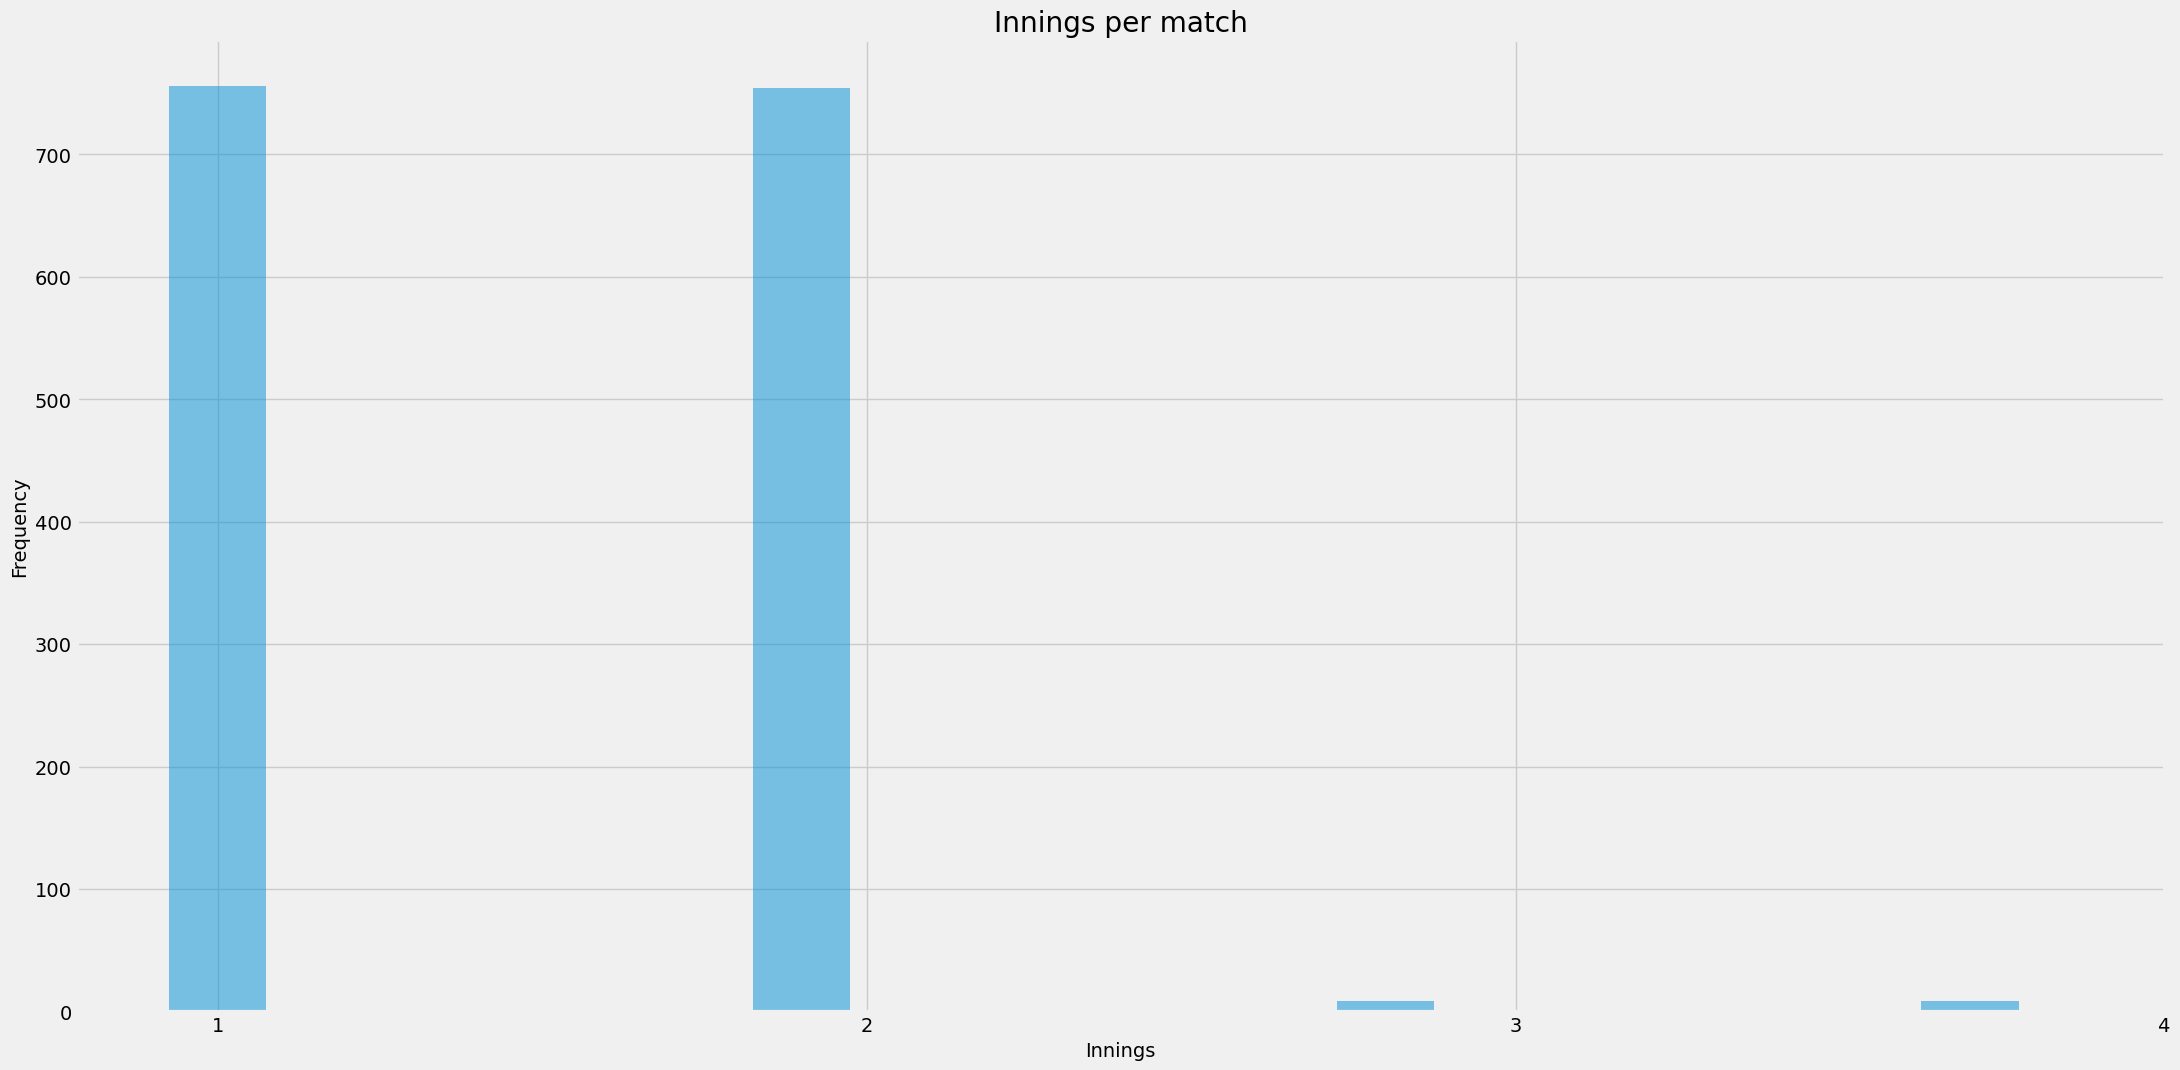

In [16]:
plt.title("Innings per match")
plt.hist(inningsInfo.InningNo, alpha=0.5, align="left", rwidth=0.5)
plt.xlabel("Innings")
plt.ylabel("Frequency")
plt.xticks(ticks=[1, 2, 3, 4])
plt.show()

## Dealing with Outliers - Innings Outliers<a class="anchor" id="Remove-Outlier-Innings"></a>
*Focus will be on first and second innings.

In [17]:
inningsInfo = inningsInfo[inningsInfo.InningNo < 3]

## Dealing with Outliers - Remove Outlier No-Results <a class="anchor" id="Remove-Outlier-No-Results"></a>
*Get rid of no results entries.

In [18]:
inningsInfo = inningsInfo[inningsInfo.Winner != "no result"]

## Scatter-Plot - Inning Scores Over the Seasons<a class="anchor" id="Scatter-Plot-Scores-Per-Innings"></a>


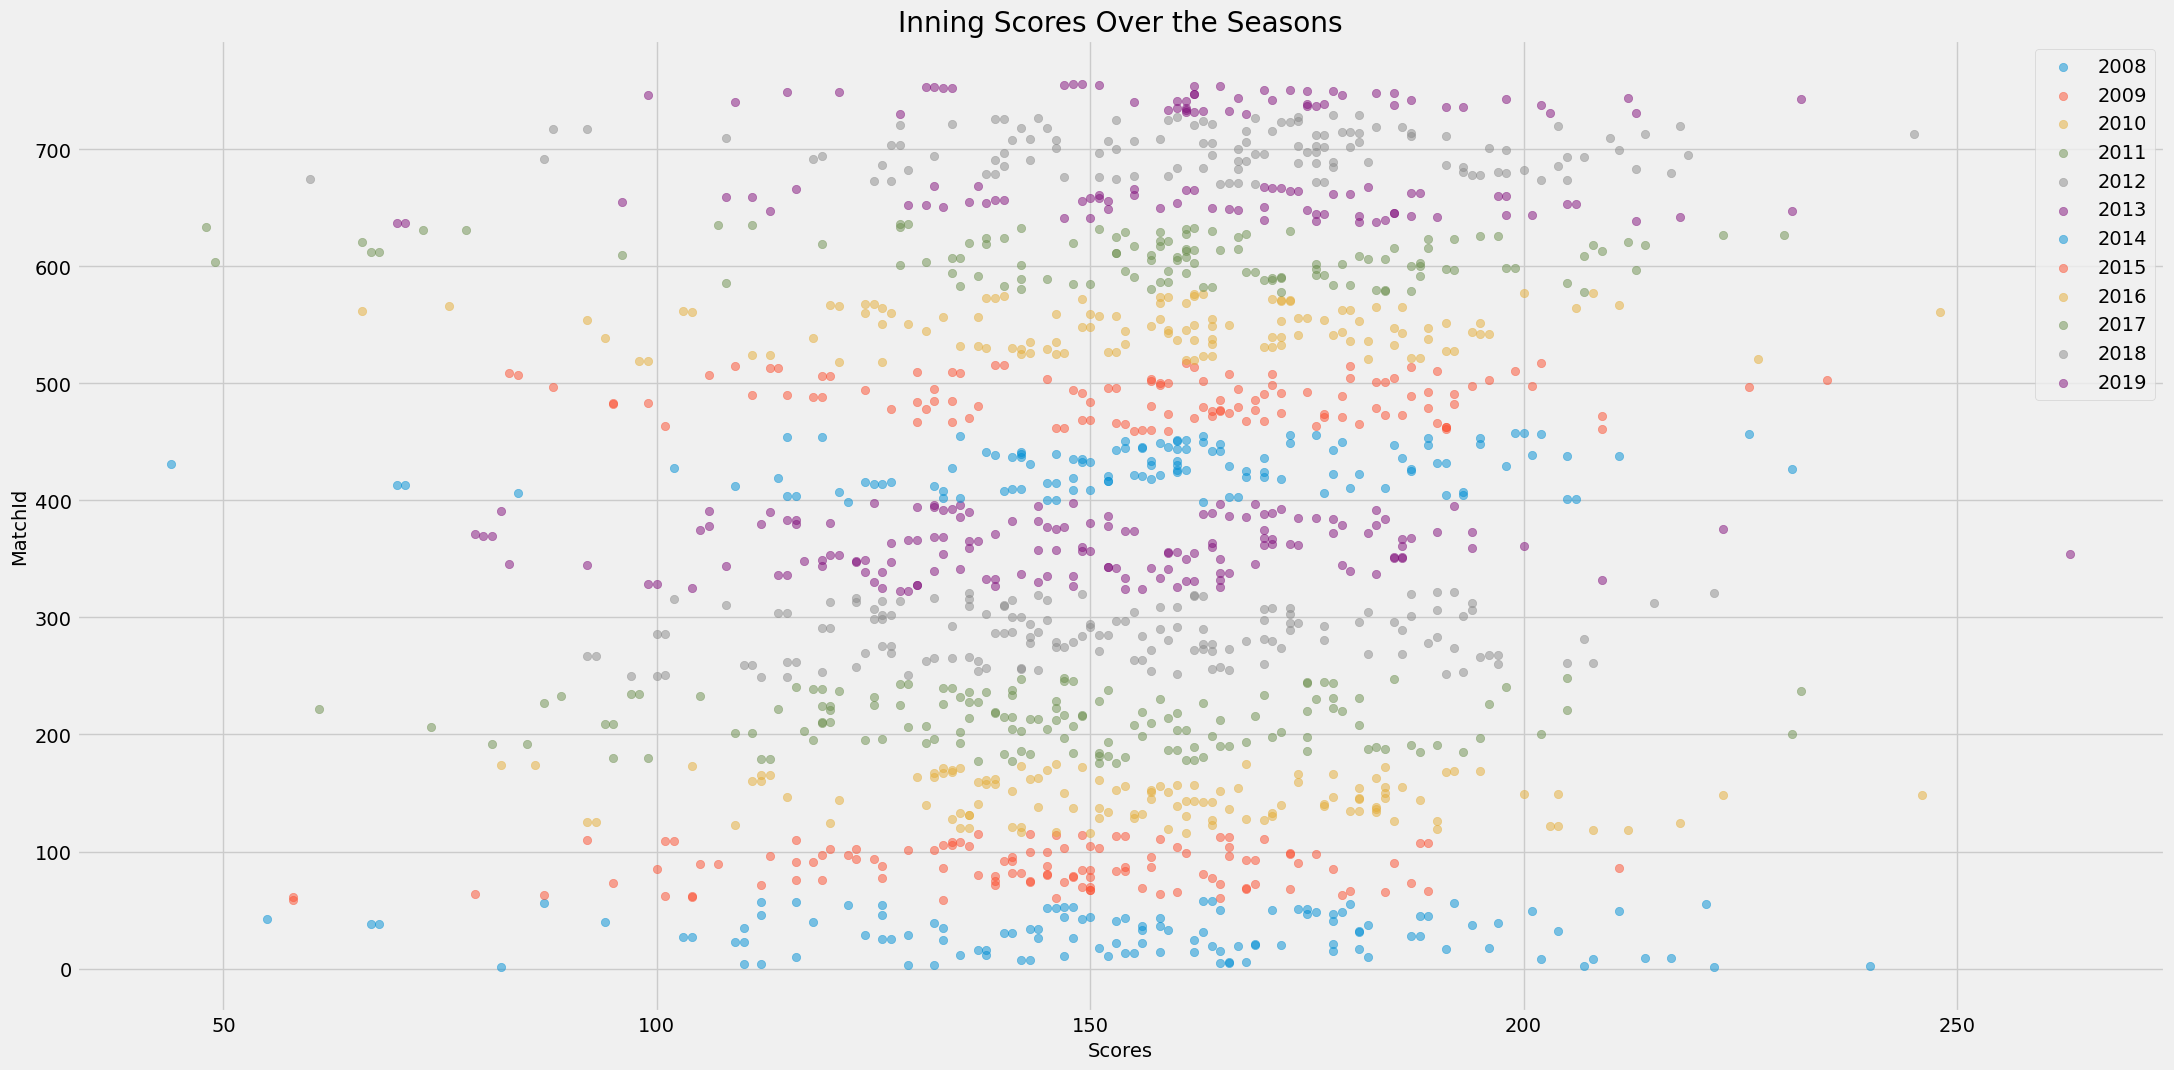

In [19]:
plt.title("Inning Scores Over the Seasons")
seasons = inningsInfo.IPL_Season.unique()
seasons.sort()
for season in seasons:
    innForSeason = inningsInfo[inningsInfo.IPL_Season == season]
    plt.scatter(
        innForSeason.teamTotalRuns, innForSeason.MatchId, alpha=0.5, label=season
    )

plt.legend()
plt.xlabel("Scores")
plt.ylabel("MatchId")
# plt.legend(inningsInfo.Season.unique())
plt.show()

In [20]:
inningsInfo.groupby("IPL_Season").mean()["teamTotalRuns"]

C:\Users\munje\AppData\Local\Temp\ipykernel_22336\3404824761.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  inningsInfo.groupby("IPL_Season").mean()["teamTotalRuns"]


IPL_Season
2008    154.629310
2009    143.157895
2010    157.200000
2011    146.513889
2012    151.709459
2013    148.296053
2014    157.575000
2015    157.394737
2016    157.183333
2017    159.059322
2018    165.841667
2019    163.533898
Name: teamTotalRuns, dtype: float64

Plot indicates avg scores are improved over the season, mean stats conclude the same.

## Average Scores Over the Seasons for Chennai Super Kings <a class="anchor" id="Histogram-Mumbai-Indians-All-Seasons"></a>

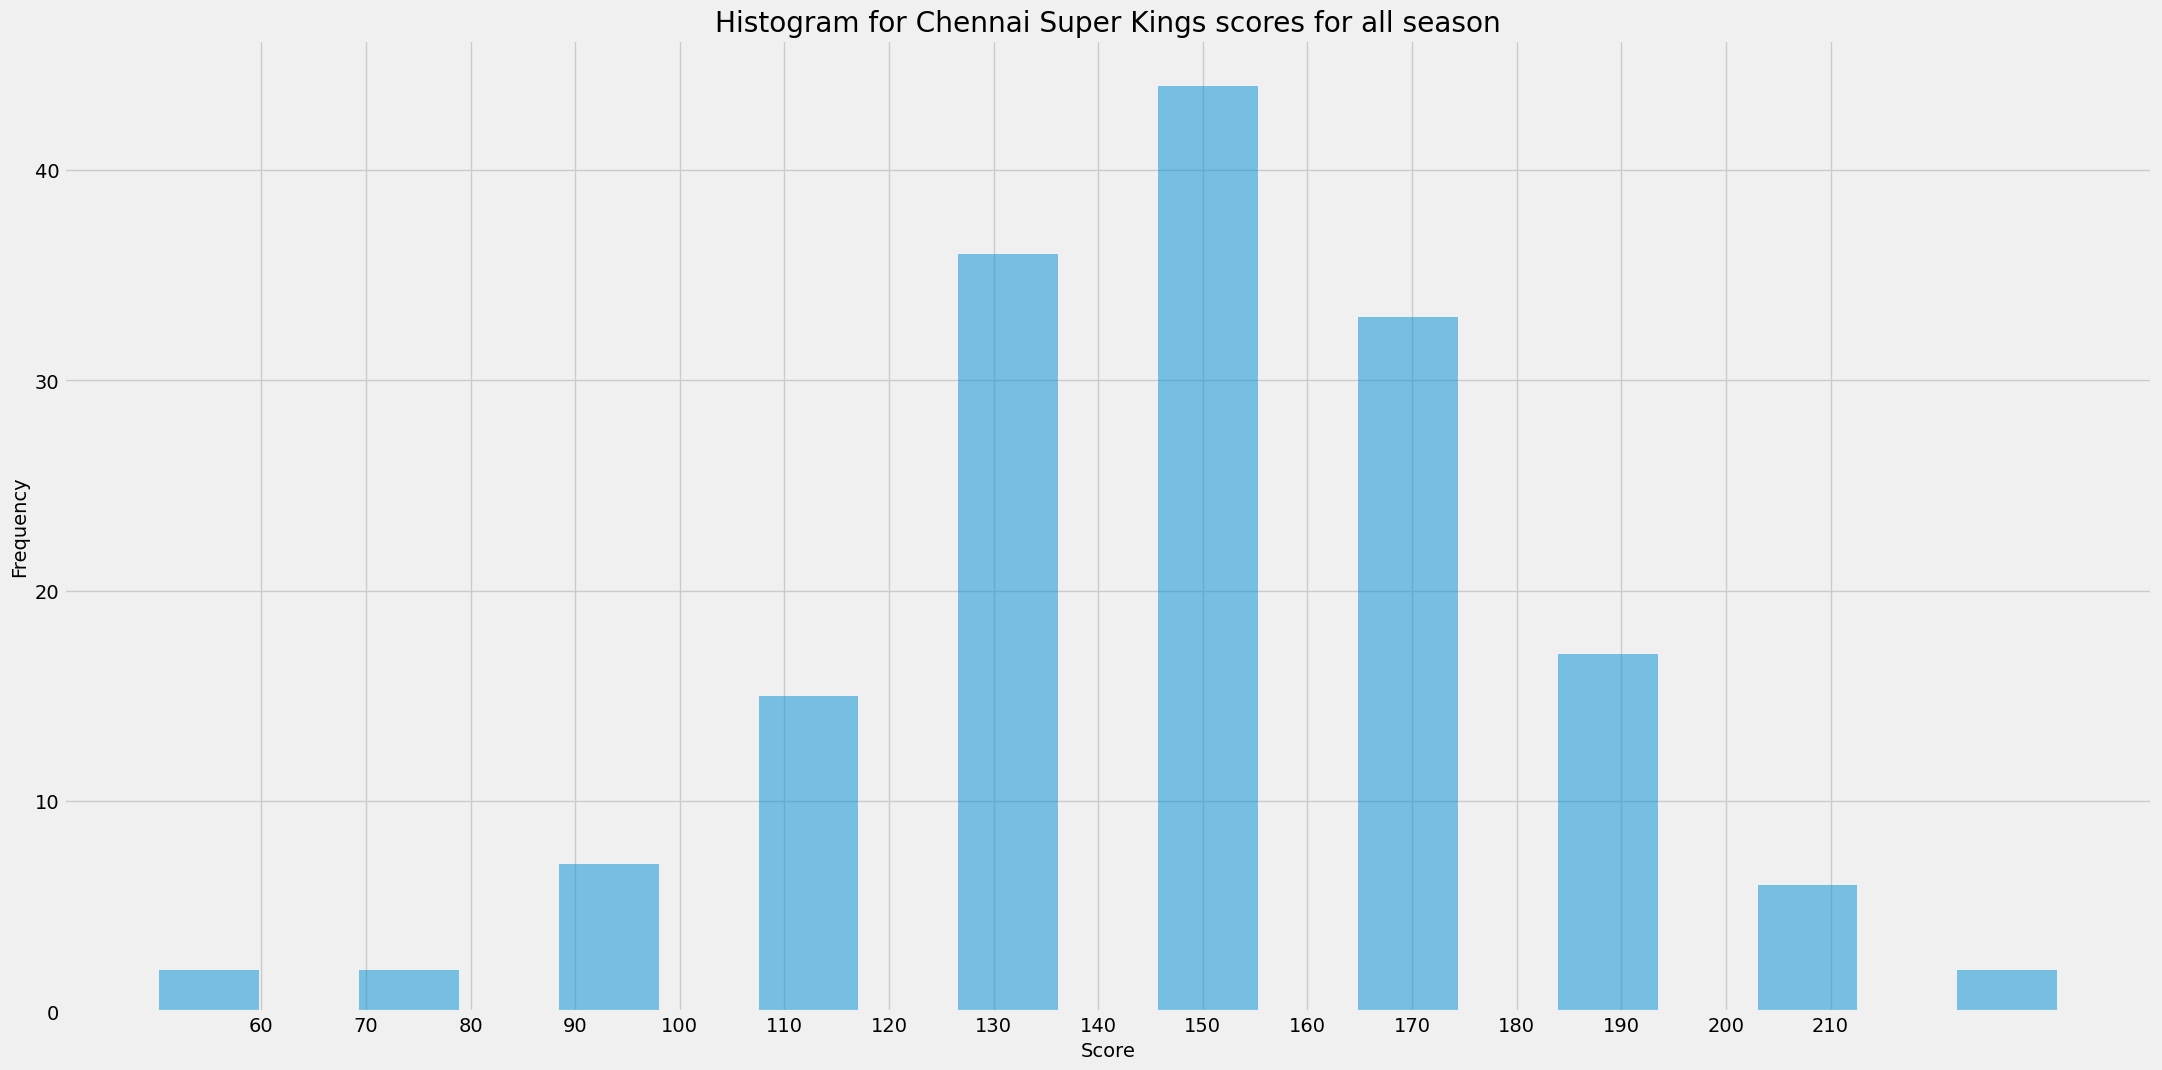

In [21]:
innForCSK = inningsInfo[inningsInfo.BattingTeam == "Chennai Super Kings"]
plt.hist(innForCSK.teamTotalRuns, alpha=0.5, align="left", rwidth=0.5)
plt.plot()
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Histogram for Chennai Super Kings scores for all season")
plt.xticks(range(60, 220, 10))
plt.show()

Histogram plot indicates CSK average score per inning, approximately 150.

## Average Scores Over the Seasons for Others <a class="anchor" id="Histogram-Other_Teams-All-Seasons"></a>

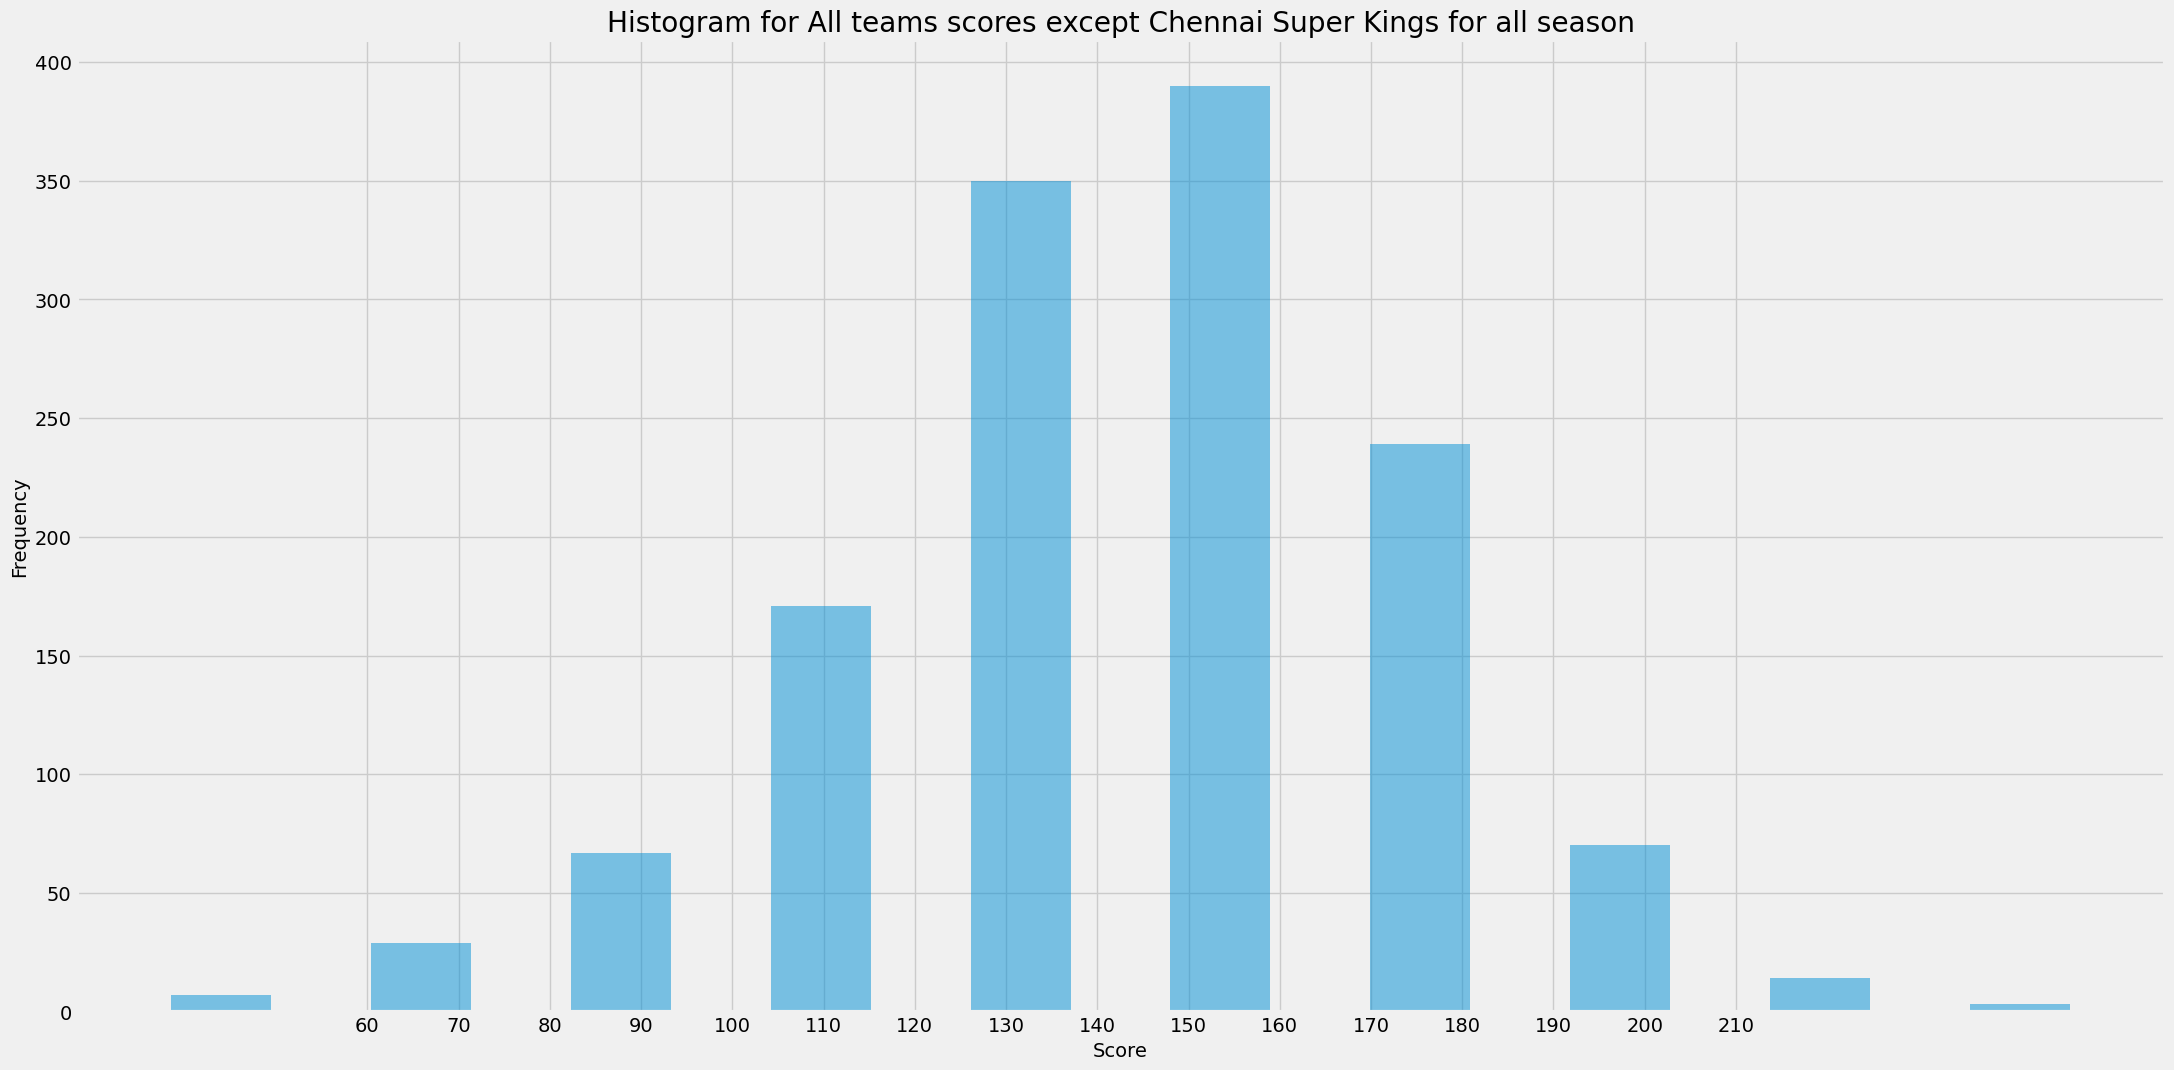

In [22]:
innForExceCSK = inningsInfo[inningsInfo.BattingTeam != "Chennai Super Kings"]
plt.hist(innForExceCSK.teamTotalRuns, alpha=0.5, align="left", rwidth=0.5)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Histogram for All teams scores except Chennai Super Kings for all season")
plt.xticks(range(60, 220, 10))
plt.show()

Histogram plot indicates all other teams average score per inning, approximately above 150.

## Discrete scenarios to compare CSK Innings Scores with Other Teams using PMF() <a class="anchor" id="Comparison-with-PMF"></a>


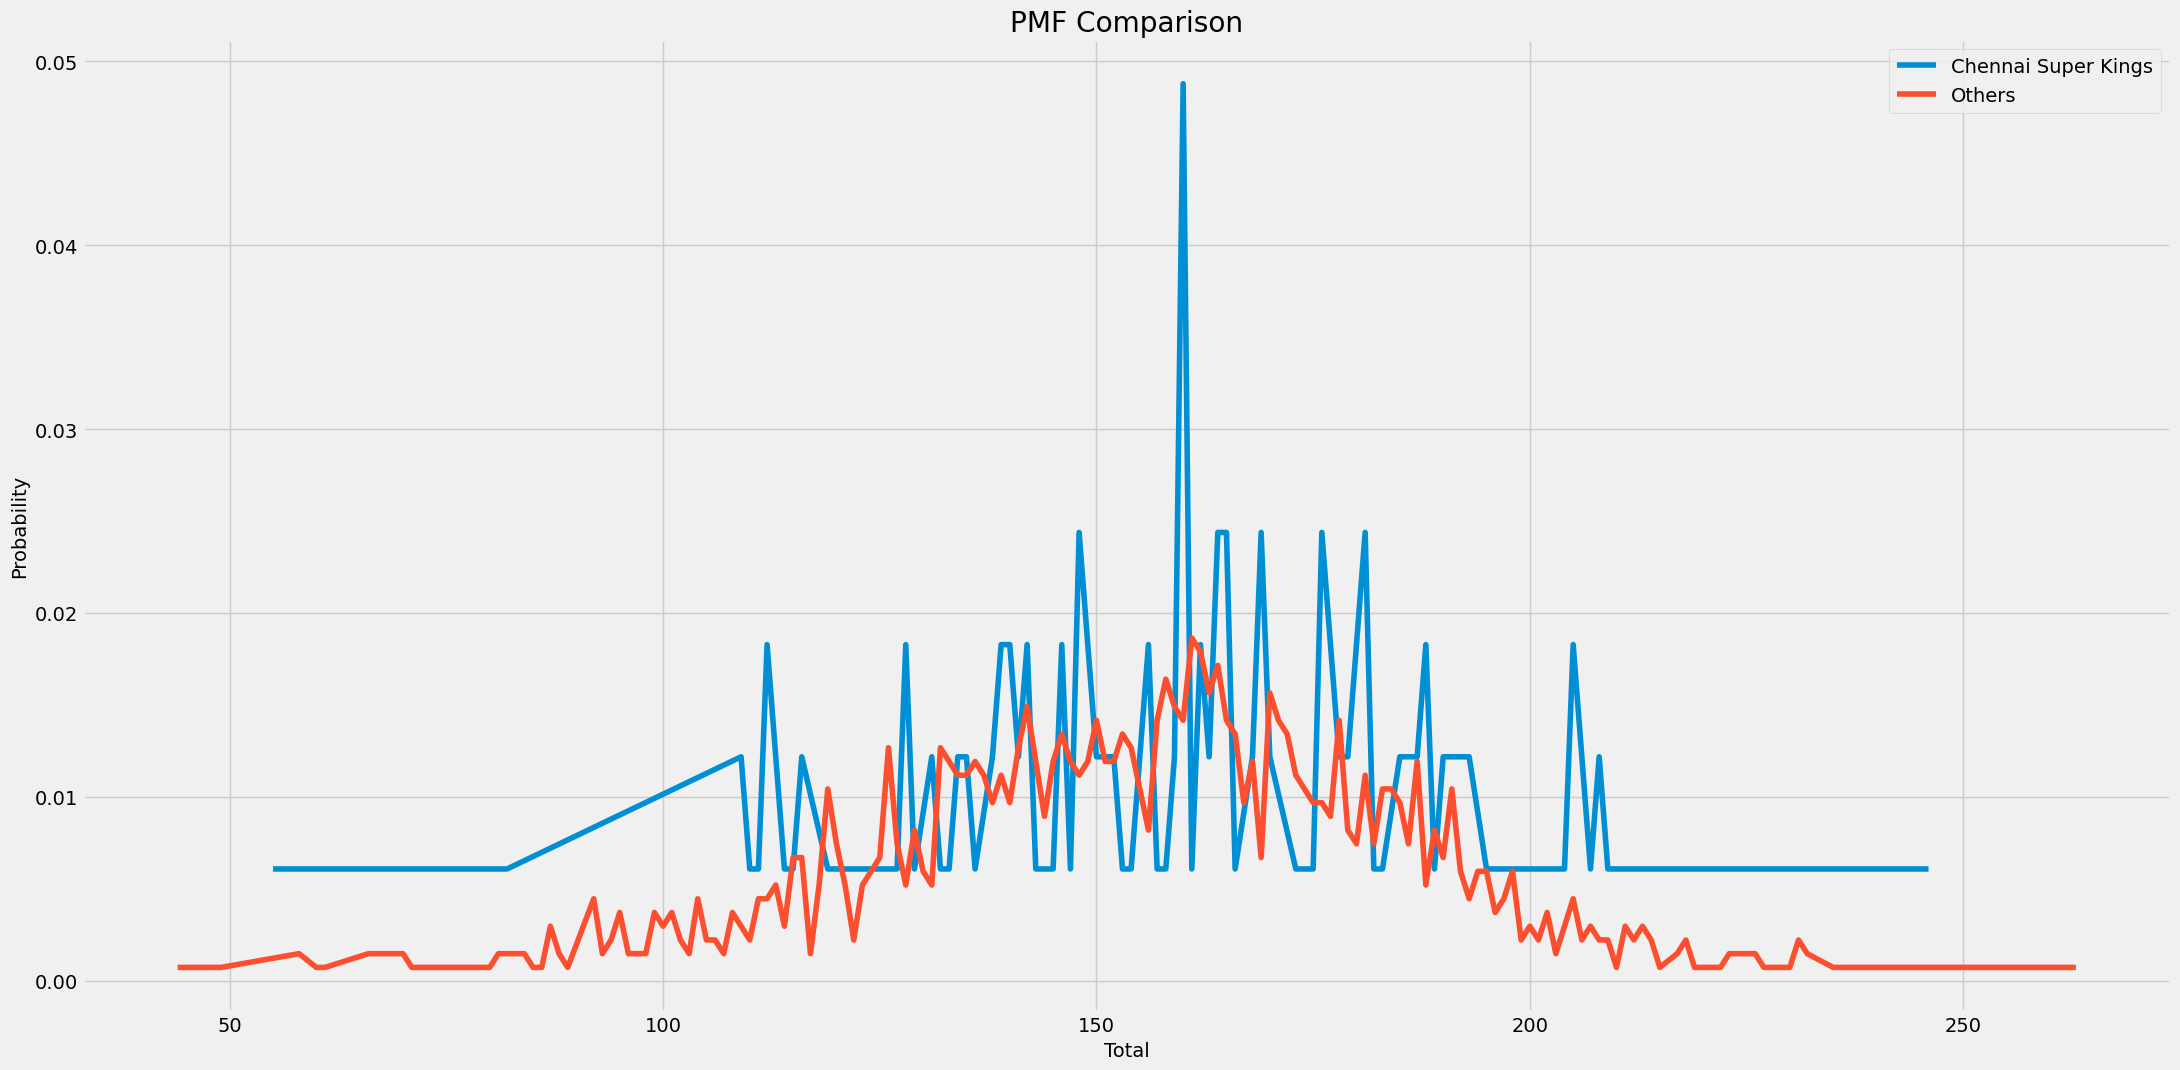

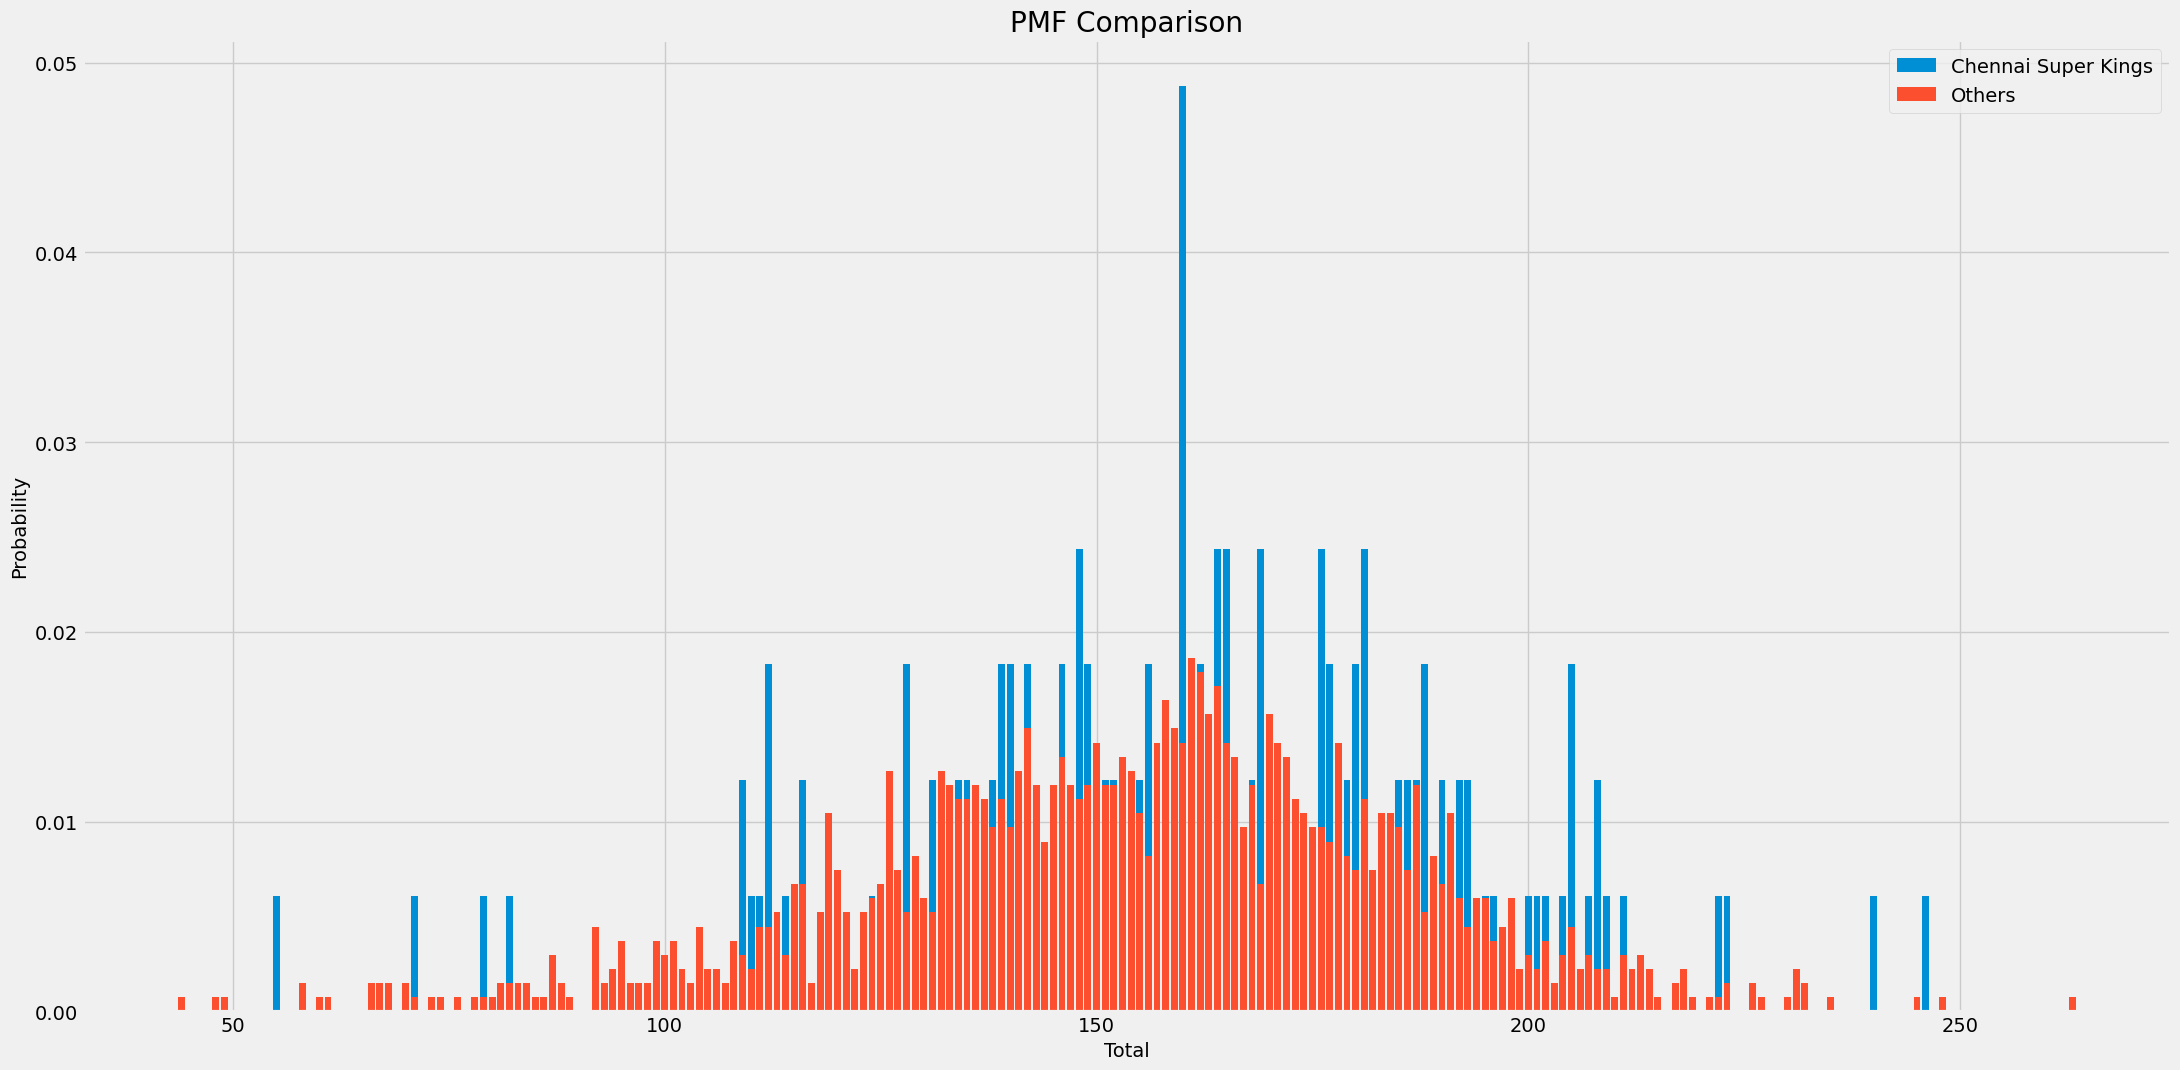

In [23]:
pmfMi = func_pmfcdf.Pmf(innForCSK.teamTotalRuns)
pmfMi.normalize()
xs, ys = pmfMi.render()
pmfExcMi = func_pmfcdf.Pmf(innForExceCSK.teamTotalRuns)
pmfExcMi.normalize()
xsExc, ysExc = pmfExcMi.render()

# Line plot
plt.plot(xs, ys, label="Chennai Super Kings")
plt.plot(xsExc, ysExc, label="Others")
plt.xlabel("Total")
plt.ylabel("Probability")
plt.title("PMF Comparison")
plt.legend()
plt.show()

# Bar chart
plt.bar(xs, ys, label="Chennai Super Kings")
plt.bar(xsExc, ysExc, label="Others")
plt.xlabel("Total")
plt.ylabel("Probability")
plt.title("PMF Comparison")
plt.legend()
plt.show()

### Comparing Chennai Super Kings-CSK Mean Scores with Others

In [24]:
print(
    f"CSK Mean Score: %0.2f \t Other Teams Mean Score: %0.2f"
    % (innForCSK.teamTotalRuns.mean(), innForExceCSK.teamTotalRuns.mean())
)

CSK Mean Score: 159.59 	 Other Teams Mean Score: 154.27



## Cumulative scenarios to compare CSK Innings Scores with Other Teams using CDF()


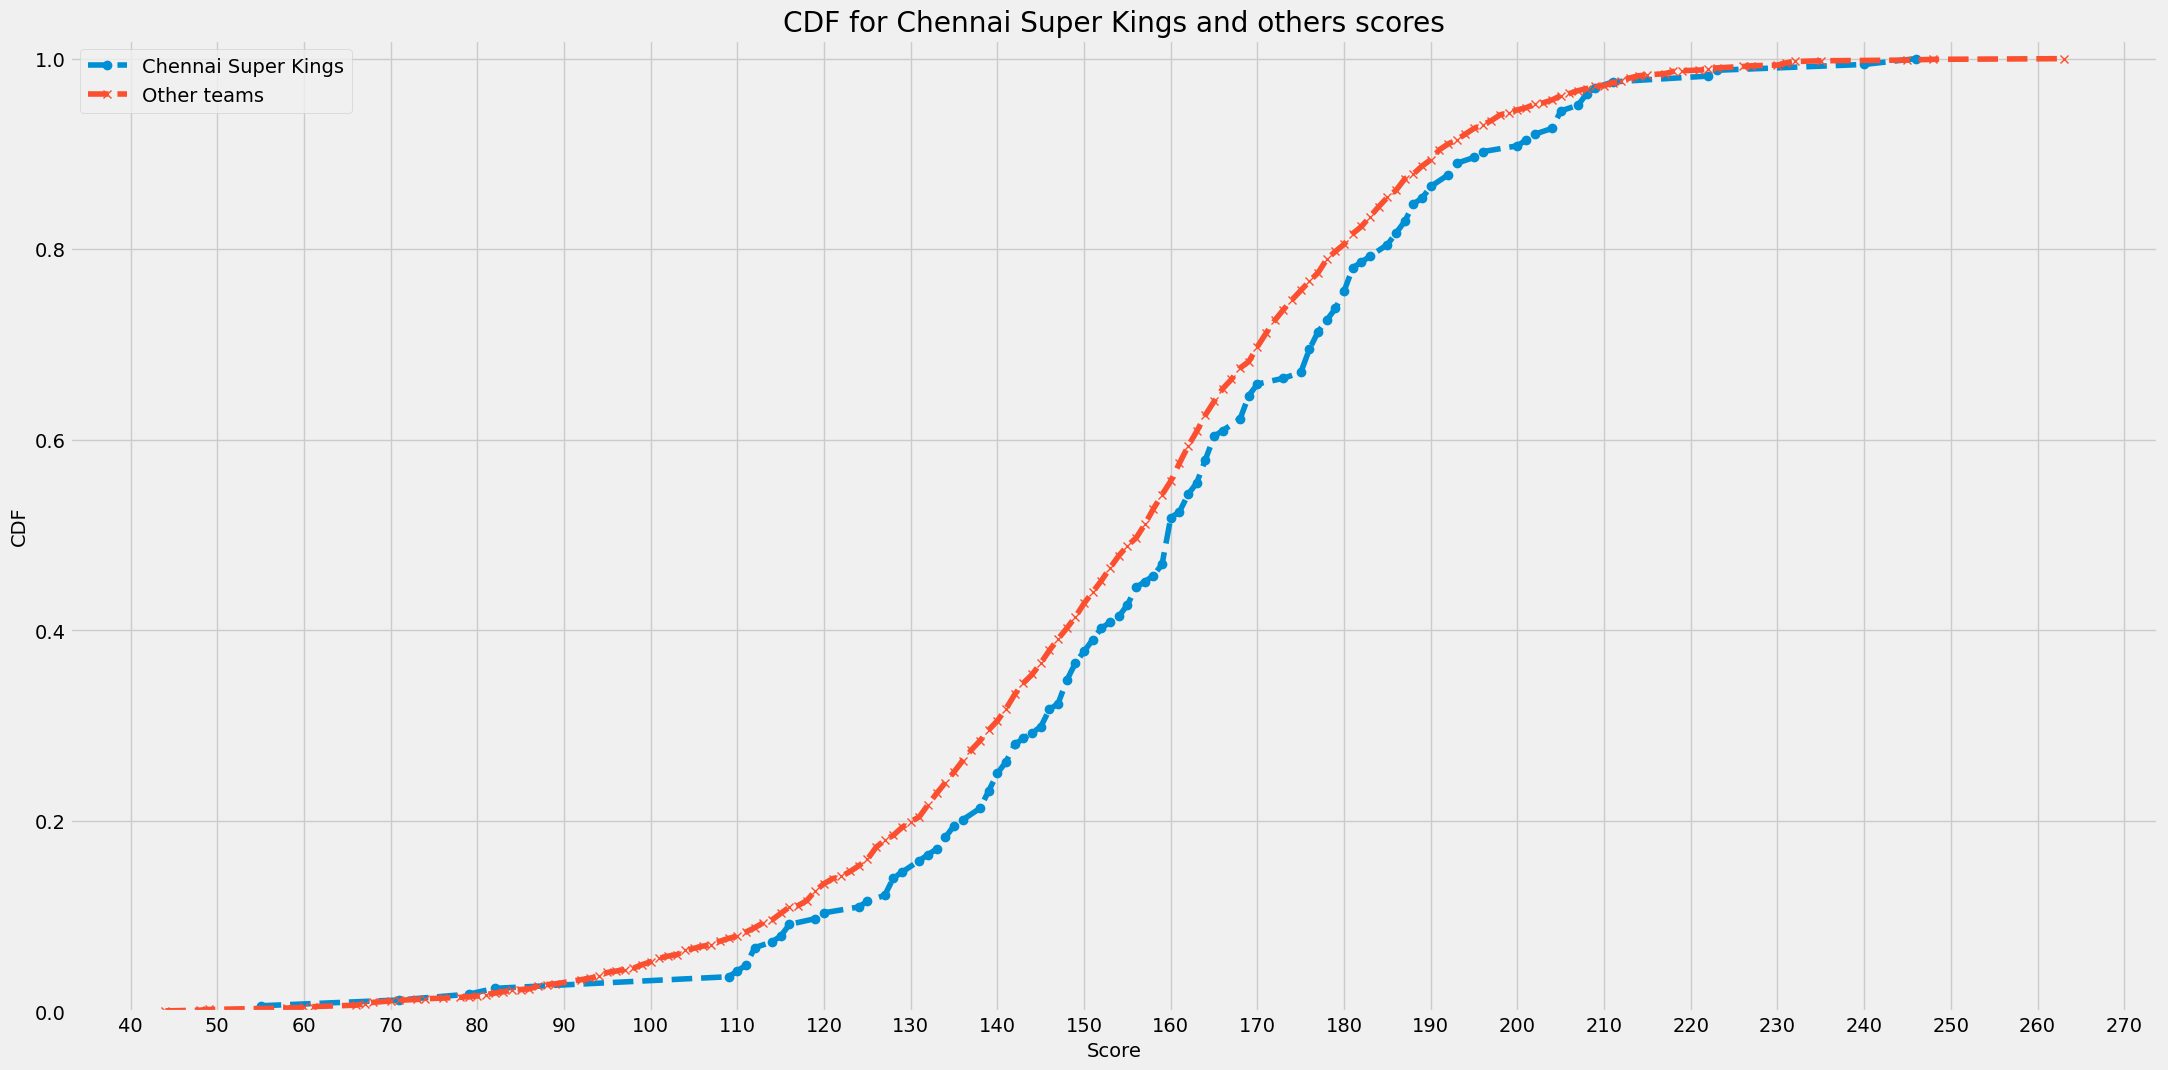

In [25]:
cdfMi, bin_edgesMi = func_pmfcdf.getCdf(innForCSK.teamTotalRuns)
cdfOther, bin_edgesOthers = func_pmfcdf.getCdf(innForExceCSK.teamTotalRuns)

# Plot the cdf
plt.plot(bin_edgesMi[0:-1], cdfMi, linestyle="--", marker="o", label="Chennai Super Kings")
plt.plot(
    bin_edgesOthers[0:-1], cdfOther, linestyle="--", marker="x", label="Other teams"
)

plt.ylim((0, 1.02))
plt.ylabel("CDF")
plt.xlabel("Score")
plt.title("CDF for Chennai Super Kings and others scores")
plt.legend()
plt.xticks(range(40, 271, 10))
plt.show()

Above plot indicates Chennai Super Kings did better to score 175 and above but others are much better compare to CSK.

## Normal Distribution Between CSK and Others using CDF() <a class="anchor" id="Normal-Distribution-CDF-Comparison"></a>
Comparison of Chennai Super Kingss and other teams with normal dstribution by finding out mu and sigma.

Normal Distribution for CSK Mean:159.59	Var:933.08	Sigma:30.55
Normal Distribution for Others Mean:154.27	Var:953.29	Sigma:30.88


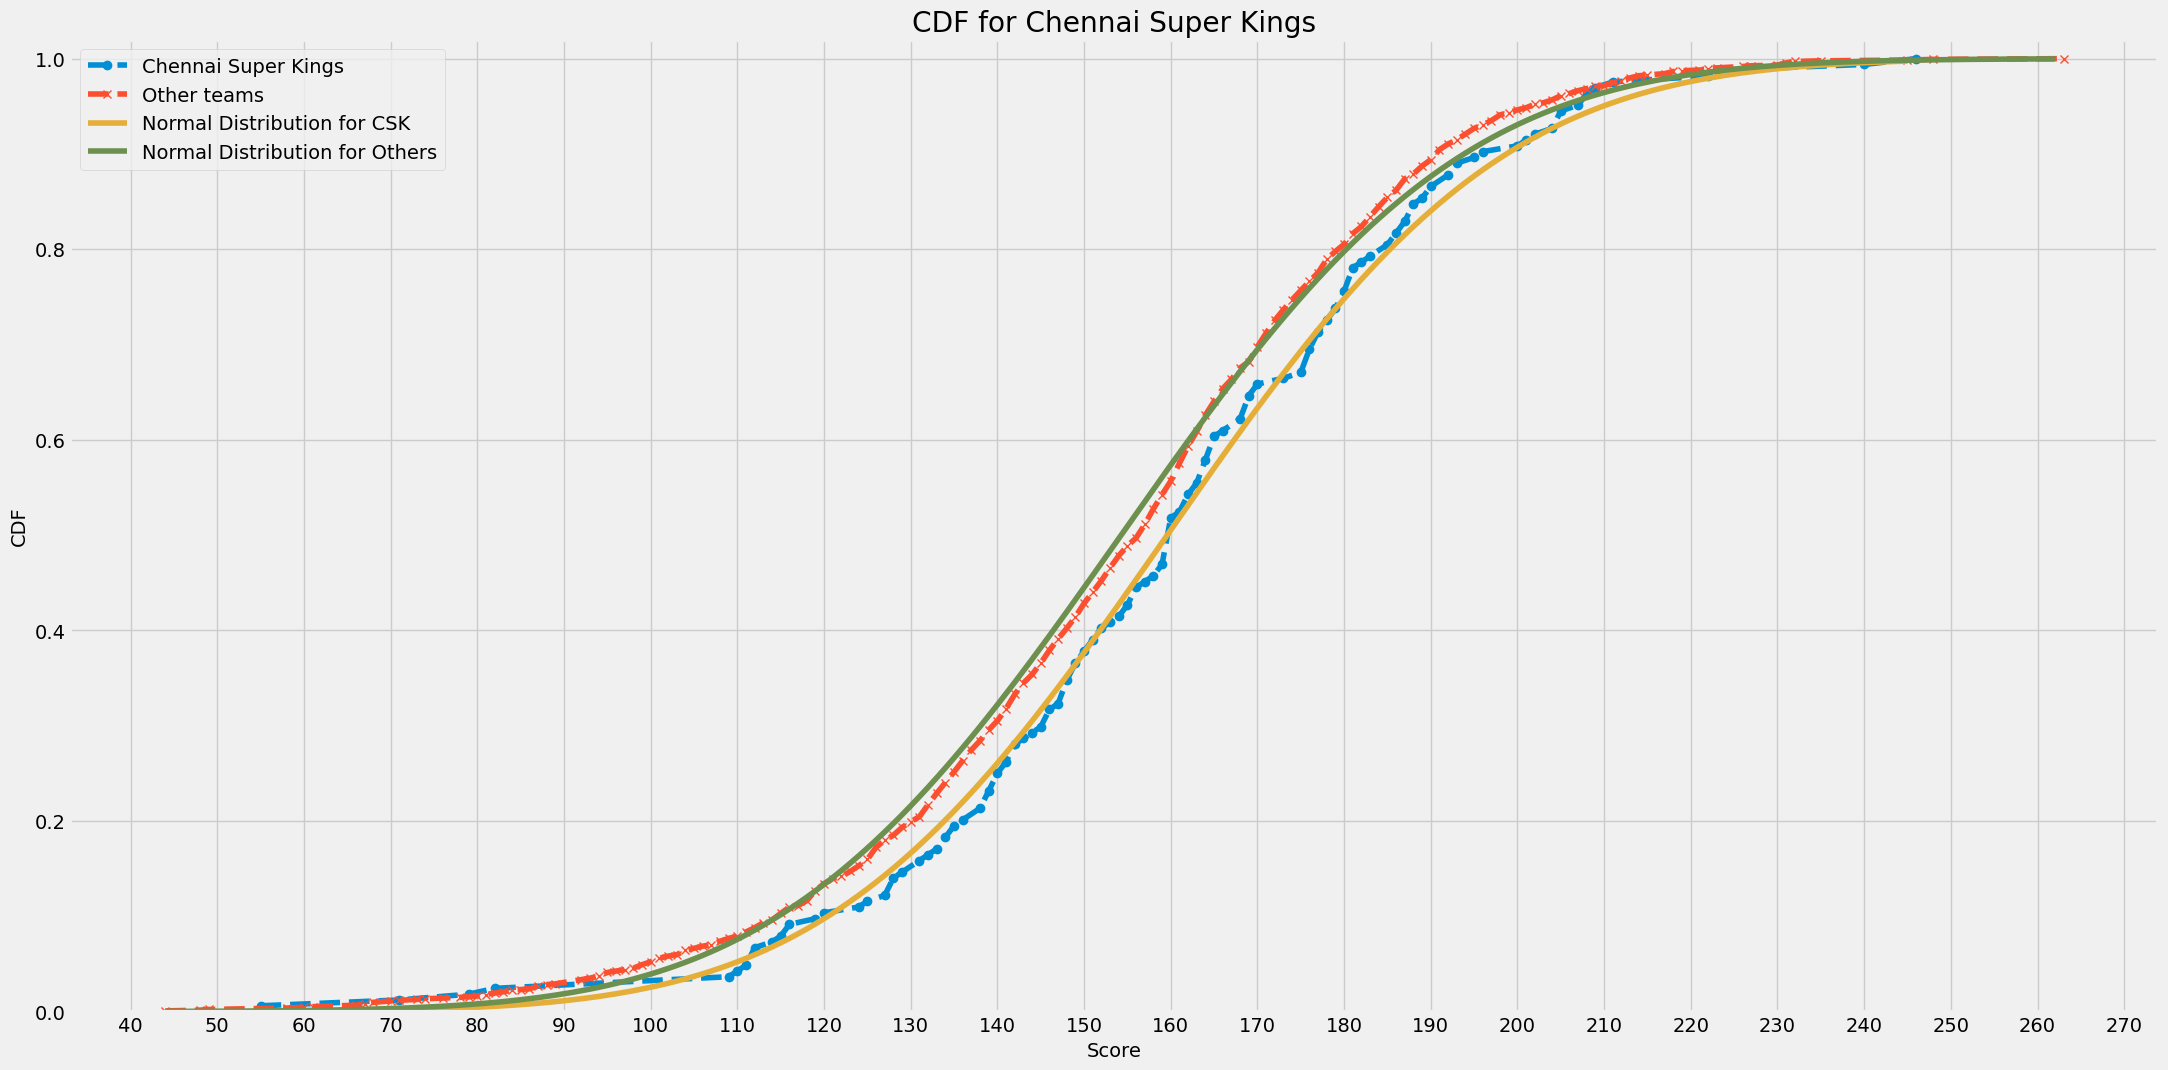

In [26]:
def plotnormalDistribution(dataset, label):
    xs = np.asarray(dataset)
    mu = xs.mean()
    ds = xs - mu
    var = np.dot(ds, ds) / (len(xs) - 0)
    sigma = np.sqrt(var)
    print(f"%s Mean:%0.2f\tVar:%0.2f\tSigma:%0.2f" % (label, mu, var, sigma))
    x = range(int(dataset.min()), int(dataset.max()))
    y = scistats.norm.cdf(x, mu, sigma)
    plt.plot(x, y, label=label)


cdfMi, bin_edgesMi = func_pmfcdf.getCdf(innForCSK.teamTotalRuns)
cdfOther, bin_edgesOthers = func_pmfcdf.getCdf(innForExceCSK.teamTotalRuns)

# Plot the cdf
plt.plot(bin_edgesMi[0:-1], cdfMi, linestyle="--", marker="o", label="Chennai Super Kings")
plt.plot(
    bin_edgesOthers[0:-1], cdfOther, linestyle="--", marker="x", label="Other teams"
)
plotnormalDistribution(innForCSK.teamTotalRuns, "Normal Distribution for CSK")
plotnormalDistribution(innForExceCSK.teamTotalRuns, "Normal Distribution for Others")

plt.ylim((0, 1.02))
plt.ylabel("CDF")
plt.xlabel("Score")
plt.title("CDF for Chennai Super Kings")
plt.legend()
plt.xticks(range(40, 271, 10))
plt.show()

## Scatter-Plot - Opening Baters Contribution Towards Total Score.<a class="anchor" id="Scatter-Plot-Opener-Contribution"></a>
Opening batsman pair contribution towards total team scores by innings, and its end results (Won/Lost)</br>
-- Use correlation matrix to justify relations and hyposthesis.

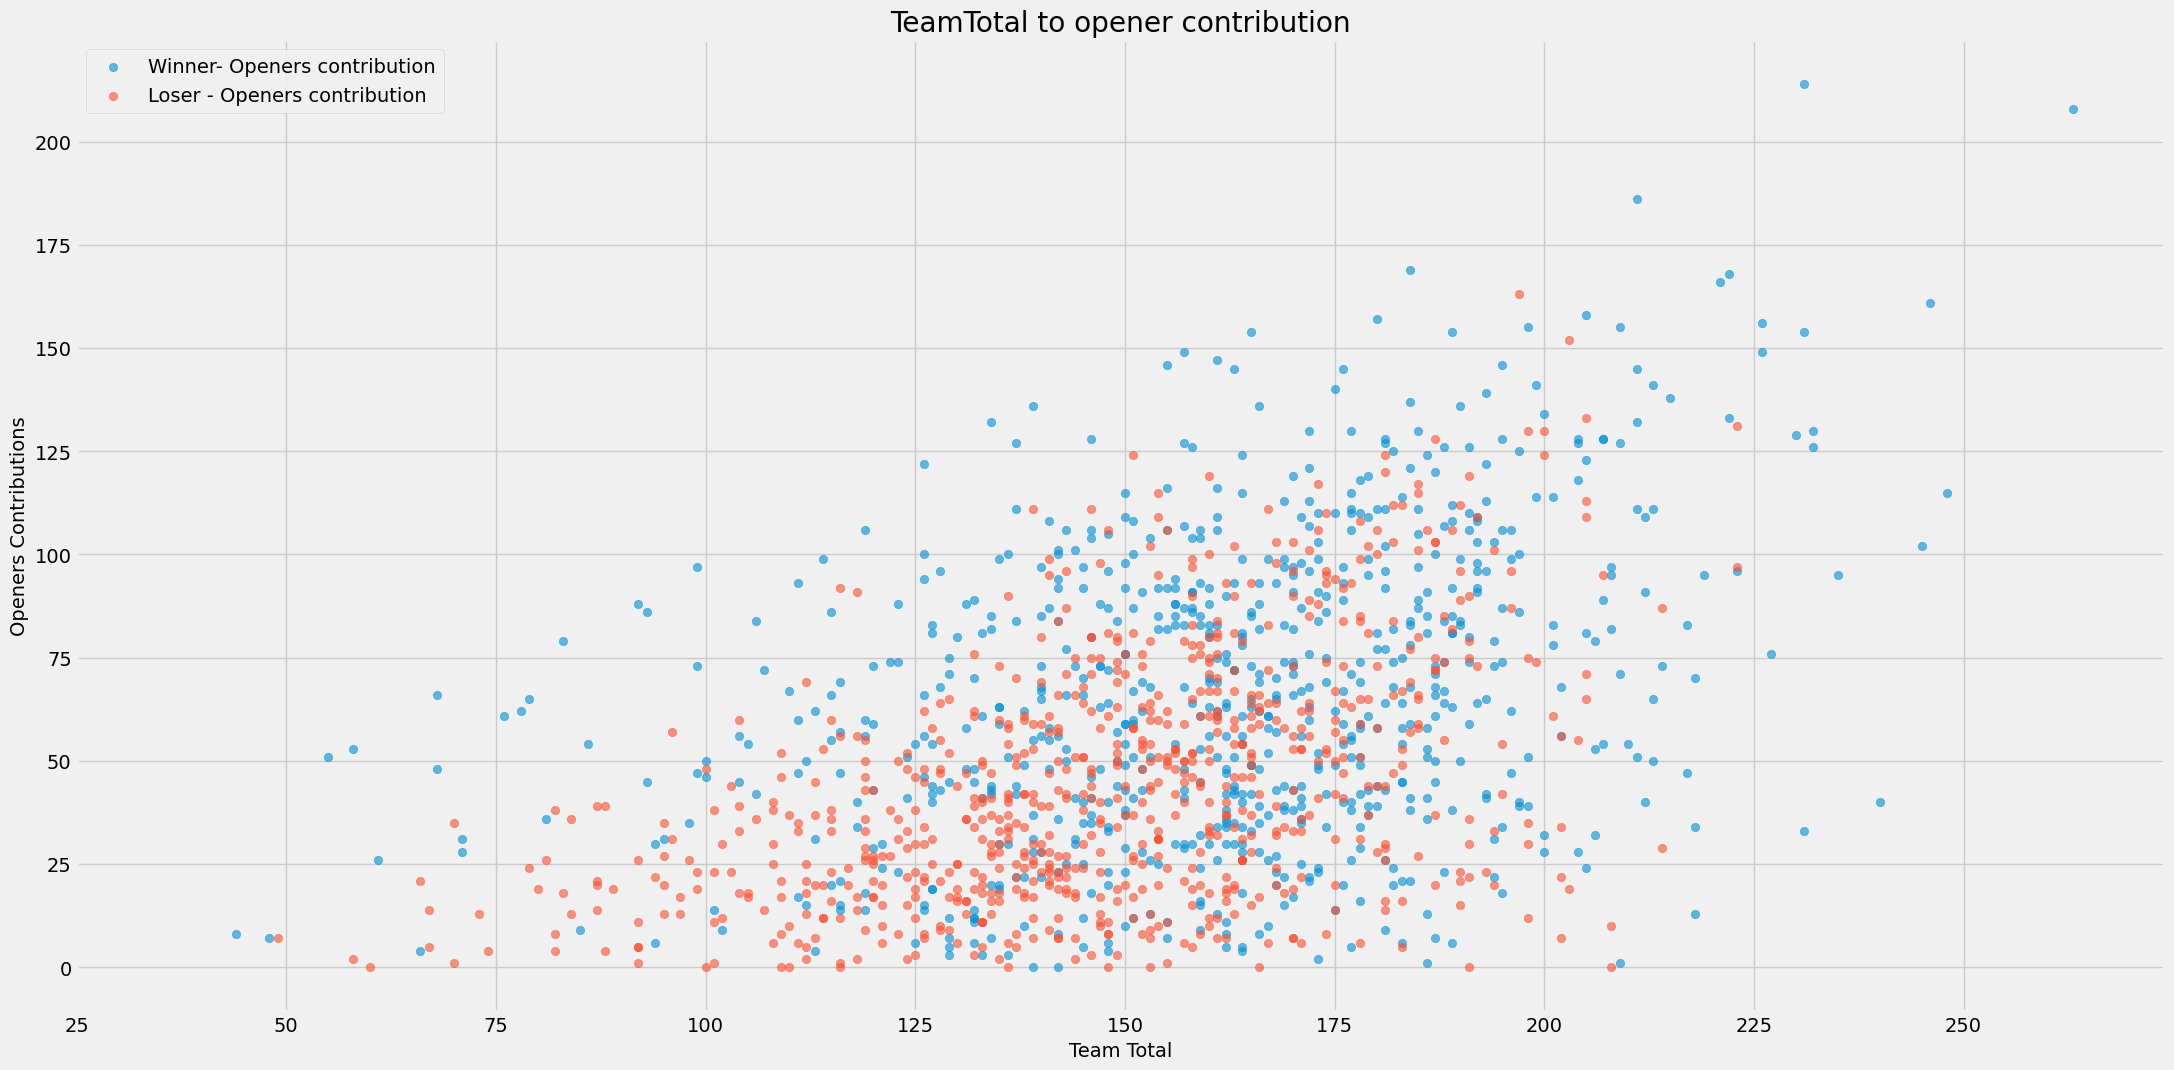

In [27]:
wonInns = inningsInfo[inningsInfo.Won == True]
lostInns = inningsInfo[inningsInfo.Won == False]
plt.scatter(
    wonInns.teamTotalRuns,
    wonInns.OpenersTotalRuns,
    alpha=0.6,
    label="Winner- Openers contribution",
)
plt.scatter(
    lostInns.teamTotalRuns,
    lostInns.OpenersTotalRuns,
    alpha=0.6,
    label="Loser - Openers contribution",
)
plt.title("TeamTotal to opener contribution")
plt.xlabel("Team Total")
plt.ylabel("Openers Contributions")
plt.legend()
plt.xticks(range(25, 275, 25))
plt.yticks(range(0, 225, 25))
plt.show()

In [28]:
tempDf = pd.concat([inningsInfo.teamTotalRuns, inningsInfo.OpenersTotalRuns], axis=1)
print("Covariance", tempDf.cov(), end="\n\n")
print("Pearson Correlation", tempDf.corr(method="pearson"), end="\n\n")

pbc = scistats.pointbiserialr(inningsInfo.OpenersTotalRuns, inningsInfo.Won)
print(pbc)

Covariance                   teamTotalRuns  OpenersTotalRuns
teamTotalRuns        954.461770        501.838433
OpenersTotalRuns     501.838433       1266.492625

Pearson Correlation                   teamTotalRuns  OpenersTotalRuns
teamTotalRuns           1.00000           0.45644
OpenersTotalRuns        0.45644           1.00000

SignificanceResult(statistic=0.3064424433593572, pvalue=4.583588404216702e-34)


*Correlation between teamTotal and Opener Batsmans contribution </br>
> Corelation matrix indicates correlation between Openers contribution and end results (winning and losing).p-value confirm this relation by rejecting null hypothesis


## Scatter-Plot - Powerplay Impact for First Six Overs Score <a class="anchor" id="Scatter-Plot-First-Six-Overs-Score"></a>
Compare First 6 overs score with total team scores by innings, color by match result.</br>
Find correlation matrix.

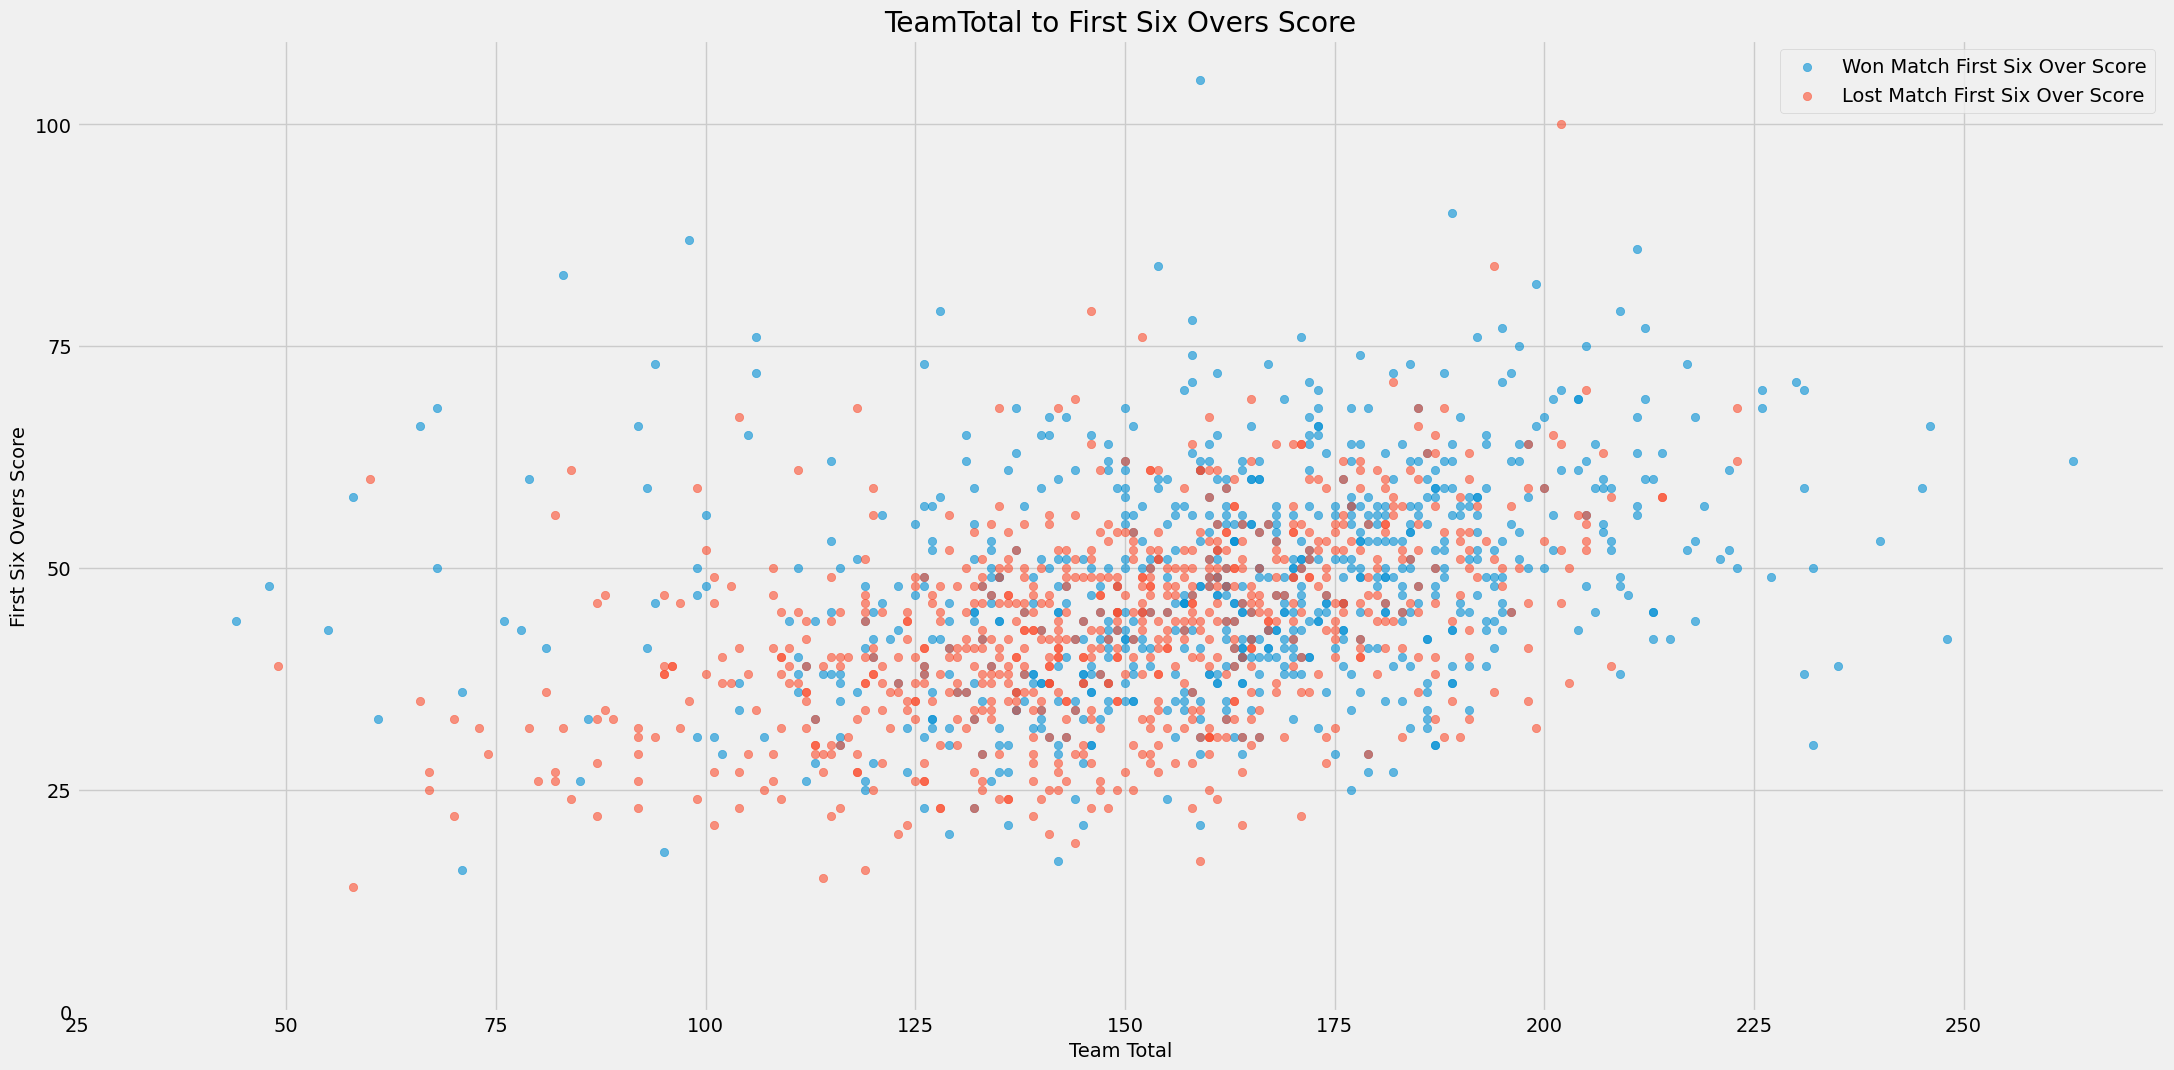

In [29]:
plt.scatter(
    wonInns.teamTotalRuns,
    wonInns.firstSixTotal,
    alpha=0.6,
    label="Won Match First Six Over Score",
)
plt.scatter(
    lostInns.teamTotalRuns,
    lostInns.firstSixTotal,
    alpha=0.6,
    label="Lost Match First Six Over Score",
)
plt.title("TeamTotal to First Six Overs Score")
plt.xlabel("Team Total")
plt.ylabel("First Six Overs Score")
plt.legend()
plt.xticks(range(25, 275, 25))
plt.yticks(range(0, 125, 25))
plt.show()

In [30]:
tempDf = pd.concat([inningsInfo.teamTotalRuns, inningsInfo.firstSixTotal], axis=1)
print("Covariance", tempDf.cov(), end="\n\n")
print("Pearson Correlation", tempDf.corr(method="pearson"), end="\n\n")

pbc = scistats.pointbiserialr(inningsInfo.firstSixTotal, inningsInfo.Won)
print(pbc)

Covariance                teamTotalRuns  firstSixTotal
teamTotalRuns      954.46177     147.381050
firstSixTotal      147.38105     145.055839

Pearson Correlation                teamTotalRuns  firstSixTotal
teamTotalRuns       1.000000       0.396091
firstSixTotal       0.396091       1.000000

SignificanceResult(statistic=0.2283302908772324, pvalue=3.066031954648354e-19)


Above correction numbers show we have positive relationship between first six overs score and total team score. 
Point biserial Correlation values shows positive relationship as well p-value rejects null hypothesis. 

## Scatter-Plot - Last Five Overs Impact on Total Score <a class="anchor" id="Scatter-Plot-Last-Five-Overs-Score"></a>
Compare Last 5 overs runs contribution towards total team score, color by match result.</br>
Find correlation matrix.

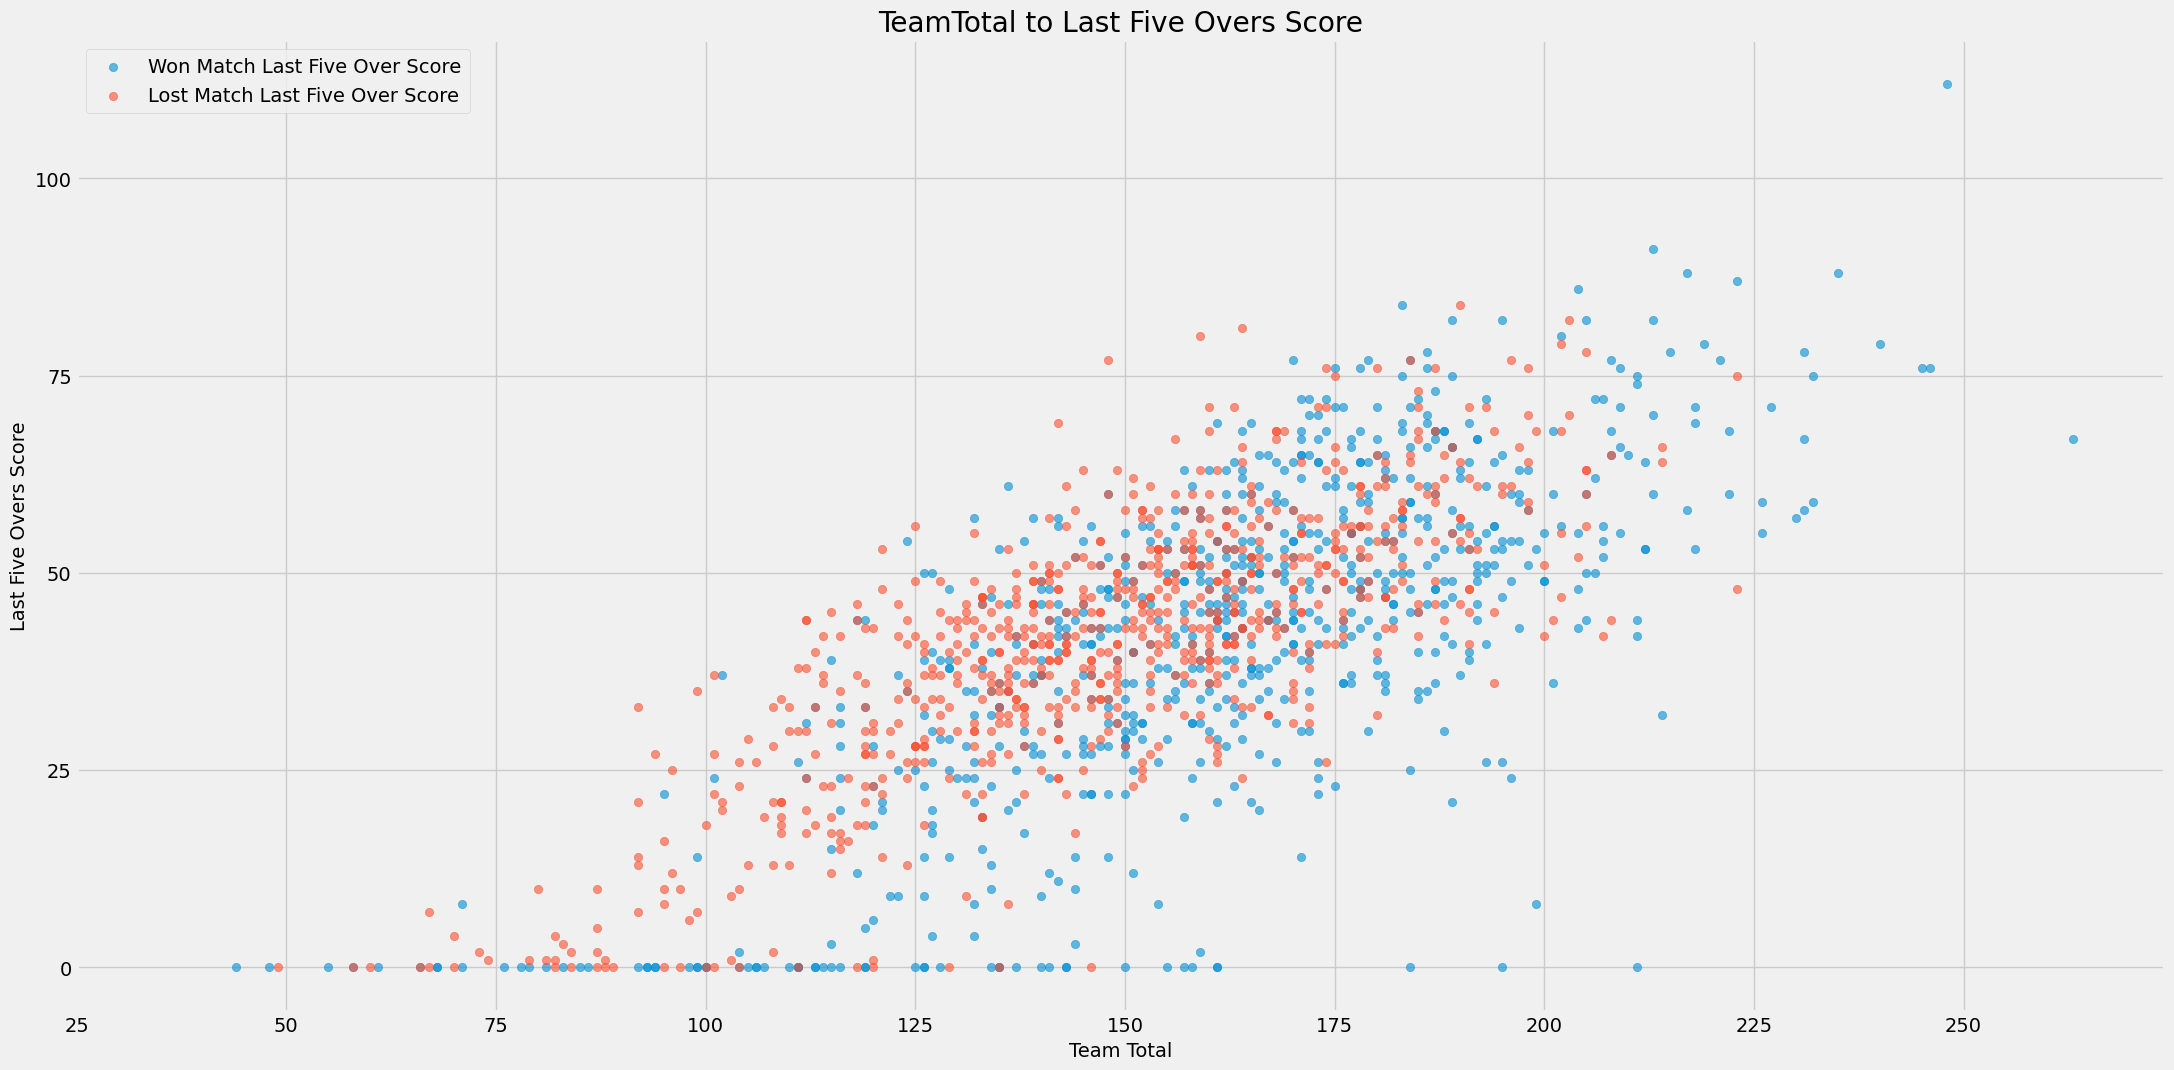

In [31]:
plt.scatter(
    wonInns.teamTotalRuns,
    wonInns.lastFiveTotal,
    alpha=0.6,
    label="Won Match Last Five Over Score",
)
plt.scatter(
    lostInns.teamTotalRuns,
    lostInns.lastFiveTotal,
    alpha=0.6,
    label="Lost Match Last Five Over Score",
)
plt.title("TeamTotal to Last Five Overs Score")
plt.xlabel("Team Total")
plt.ylabel("Last Five Overs Score")
plt.legend()
plt.xticks(range(25, 275, 25))
plt.yticks(range(0, 125, 25))
plt.show()

In [32]:
tempDf = pd.concat([inningsInfo.teamTotalRuns, inningsInfo.lastFiveTotal], axis=1)
print("Covariance", tempDf.cov(), end="\n\n")
print("Pearson Correlation", tempDf.corr(method="pearson"), end="\n\n")

pbc = scistats.pointbiserialr(inningsInfo.Won, inningsInfo.lastFiveTotal)
print(pbc)

Covariance                teamTotalRuns  lastFiveTotal
teamTotalRuns     954.461770     418.696843
lastFiveTotal     418.696843     348.678816

Pearson Correlation                teamTotalRuns  lastFiveTotal
teamTotalRuns       1.000000       0.725784
lastFiveTotal       0.725784       1.000000

SignificanceResult(statistic=0.026314742201529143, pvalue=0.30779881584986263)


Above matrix confirms positive relationship between last five overs score and total team score. 
Point biserial Correlation values shows positive relationship however p-value is not rejecting null hypothesis as p-value is greater than 0.05. 

## Scatter-Plot - Runs Conceded During First Five Overs <a class="anchor" id="Scatter-Plot-Runs-Conceded-in-First-Six-Overs"></a>
Compare how runs conceded in first 5 overs impact winning or losing

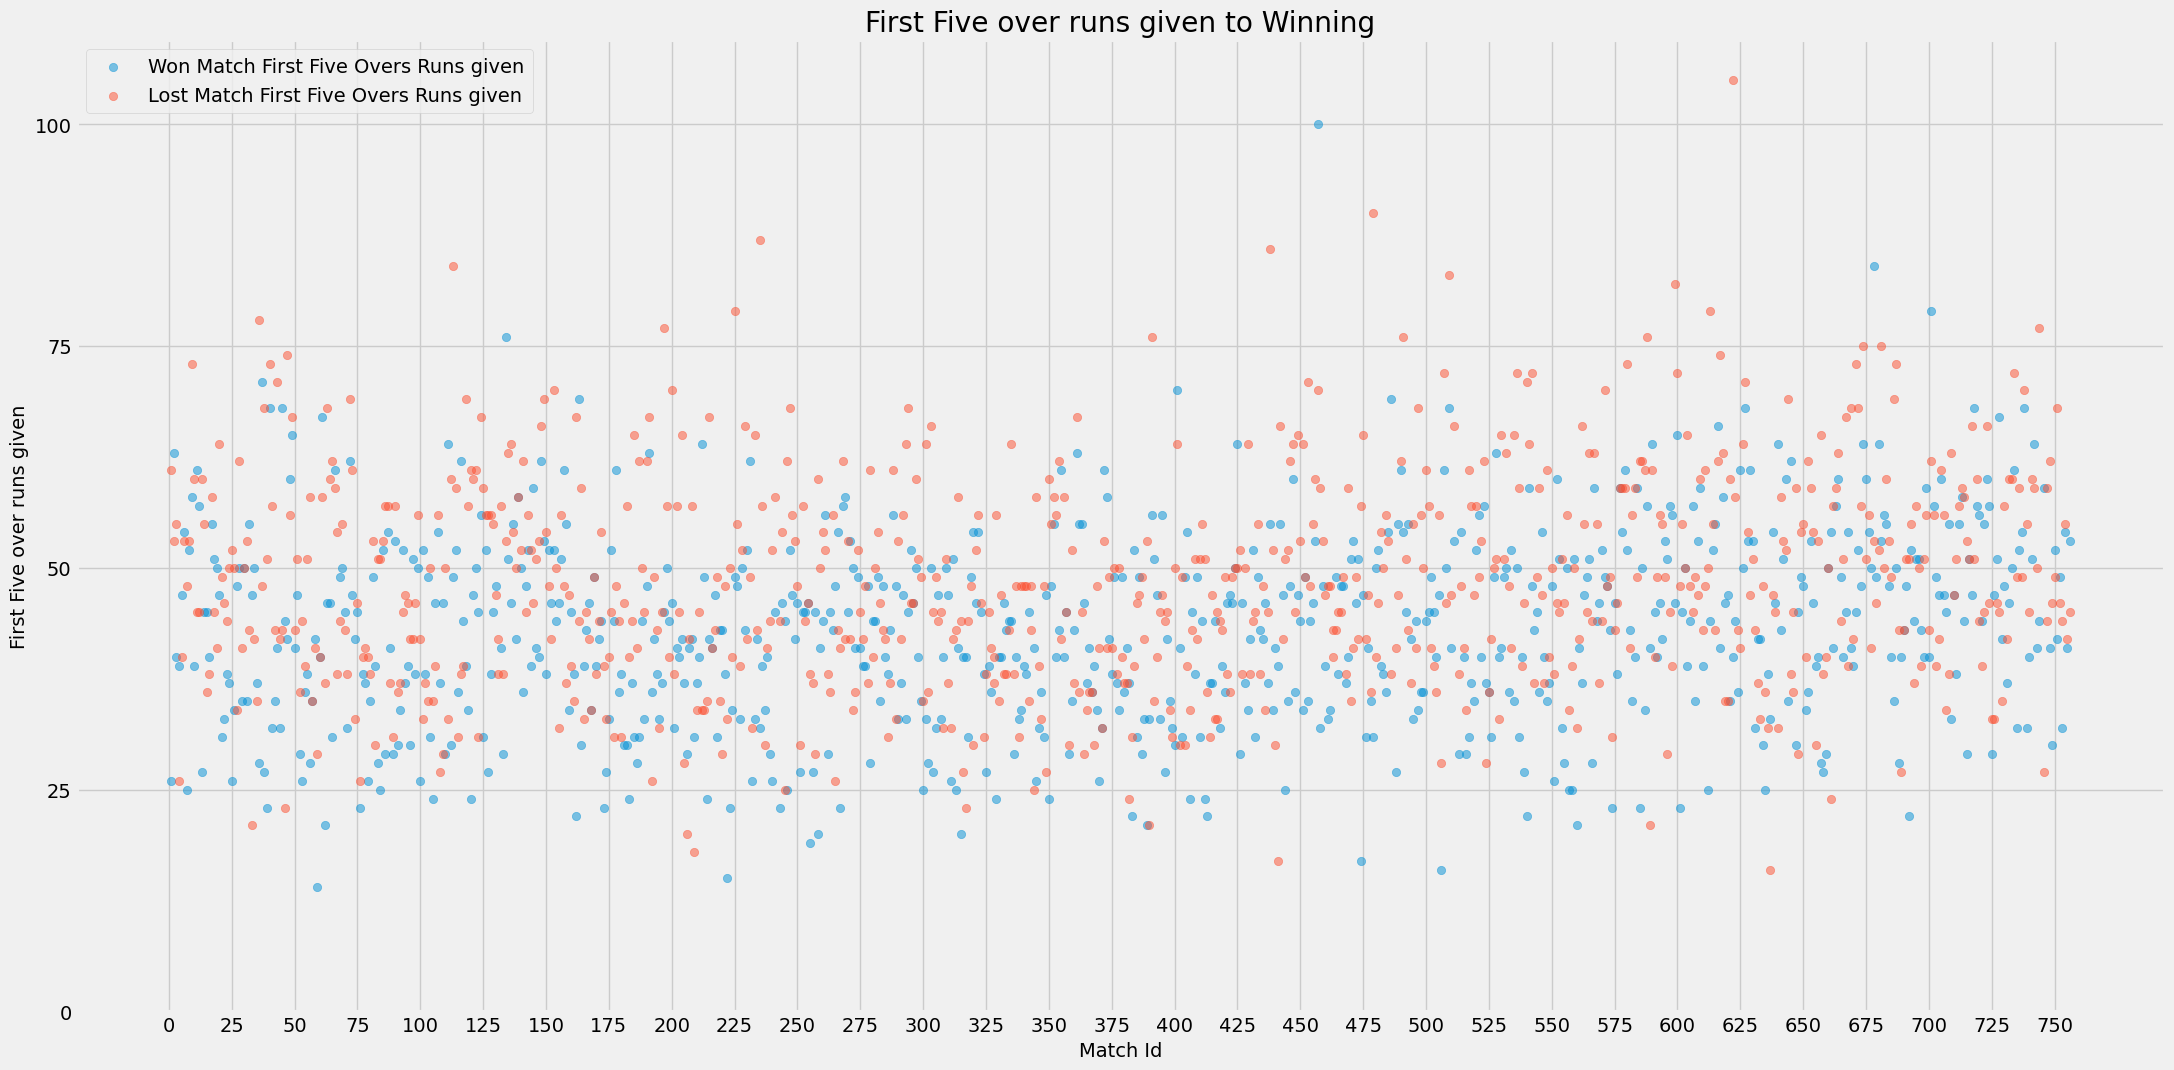

In [33]:
plt.scatter(
    wonInns.MatchId,
    wonInns.firstSixTotalGiven,
    alpha=0.5,
    label="Won Match First Five Overs Runs given",
)
plt.scatter(
    lostInns.MatchId,
    lostInns.firstSixTotalGiven,
    alpha=0.5,
    label="Lost Match First Five Overs Runs given",
)
plt.title("First Five over runs given to Winning")
plt.xlabel("Match Id")
plt.ylabel("First Five over runs given")
plt.legend()
plt.xticks(range(0, 760, 25))
plt.yticks(range(0, 125, 25))
plt.show()

In [34]:
pbc = scistats.pointbiserialr(inningsInfo.firstSixTotalGiven, inningsInfo.Won)
print(pbc)

SignificanceResult(statistic=-0.22498194053040915, pvalue=1.0344301557061923e-18)


Above correction numbers show we have negative relationship between first six overs runs given to oppenent and winning and losing. 
P-value is rejecting null hypothesis as p-value is very small. 

## Scatter-Plot - Runs Conceded During First Five Overs <a class="anchor" id="Scatter-Plot-Runs-Conceded-in-Last-Five-Overs"></a>
Compare how runs conceded in last 5 overs impact winning or losingovers

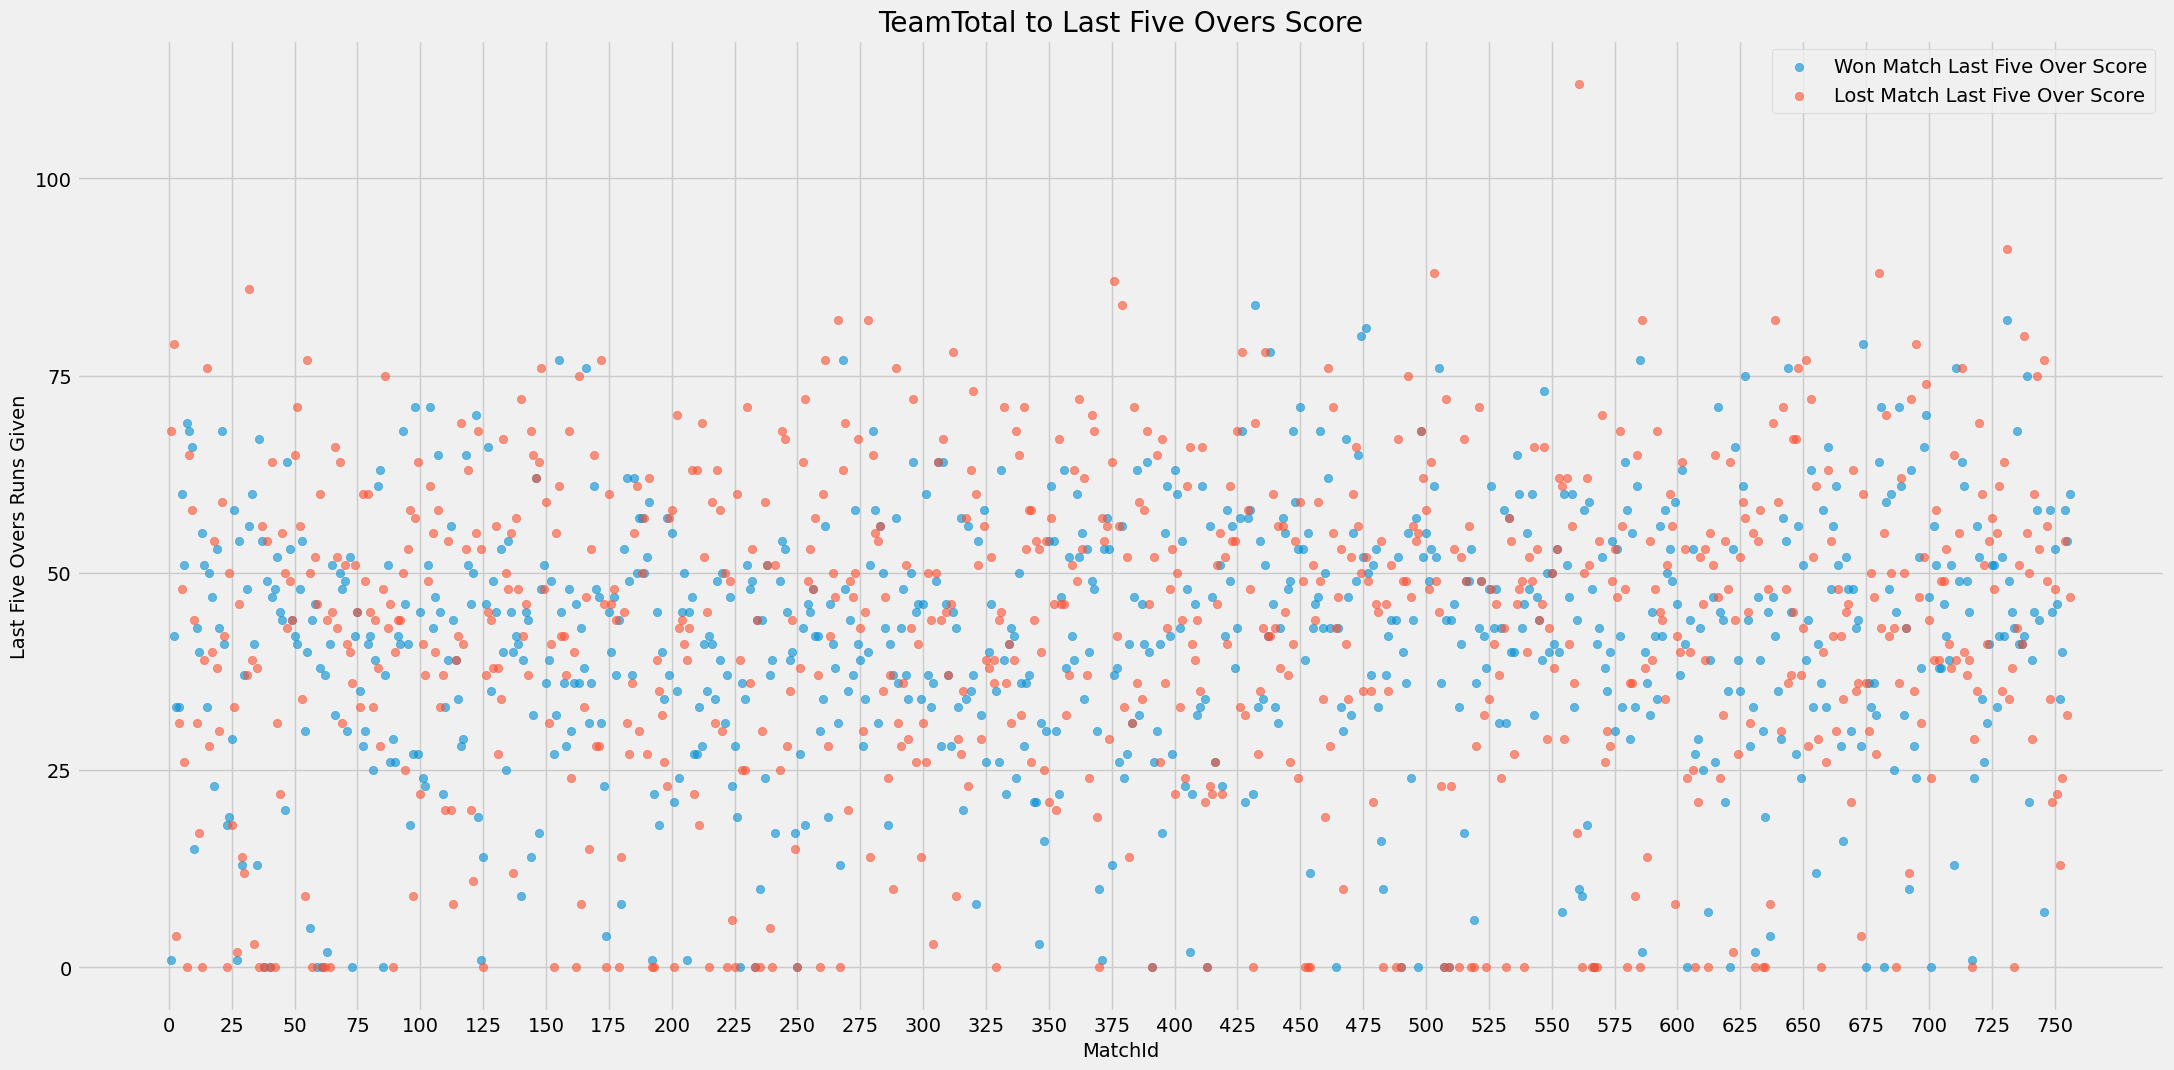

In [35]:
plt.scatter(
    wonInns.MatchId,
    wonInns.lastFiveTotalGiven,
    alpha=0.6,
    label="Won Match Last Five Over Score",
)
plt.scatter(
    lostInns.MatchId,
    lostInns.lastFiveTotalGiven,
    alpha=0.6,
    label="Lost Match Last Five Over Score",
)
plt.title("TeamTotal to Last Five Overs Score")
plt.xlabel("MatchId")
plt.ylabel("Last Five Overs Runs Given")
plt.legend()
plt.xticks(range(0, 760, 25))
plt.yticks(range(0, 125, 25))
plt.show()

In [36]:
pbc = scistats.pointbiserialr(inningsInfo.lastFiveTotalGiven, inningsInfo.Won)
print(pbc)

SignificanceResult(statistic=-0.03338726466980052, pvalue=0.19563420150438063)


Above numbers shows that the relationship is very weak also p-value indicates the null hypothesis is not false

## Hypothesis Test - About King Kholi Innings <a class="anchor" id="Hypothesis-Test"></a>
Virat Kohli - widely known as King Kholi, scores better in second innings ?

Observer Difference:5.76
PValue:0.17


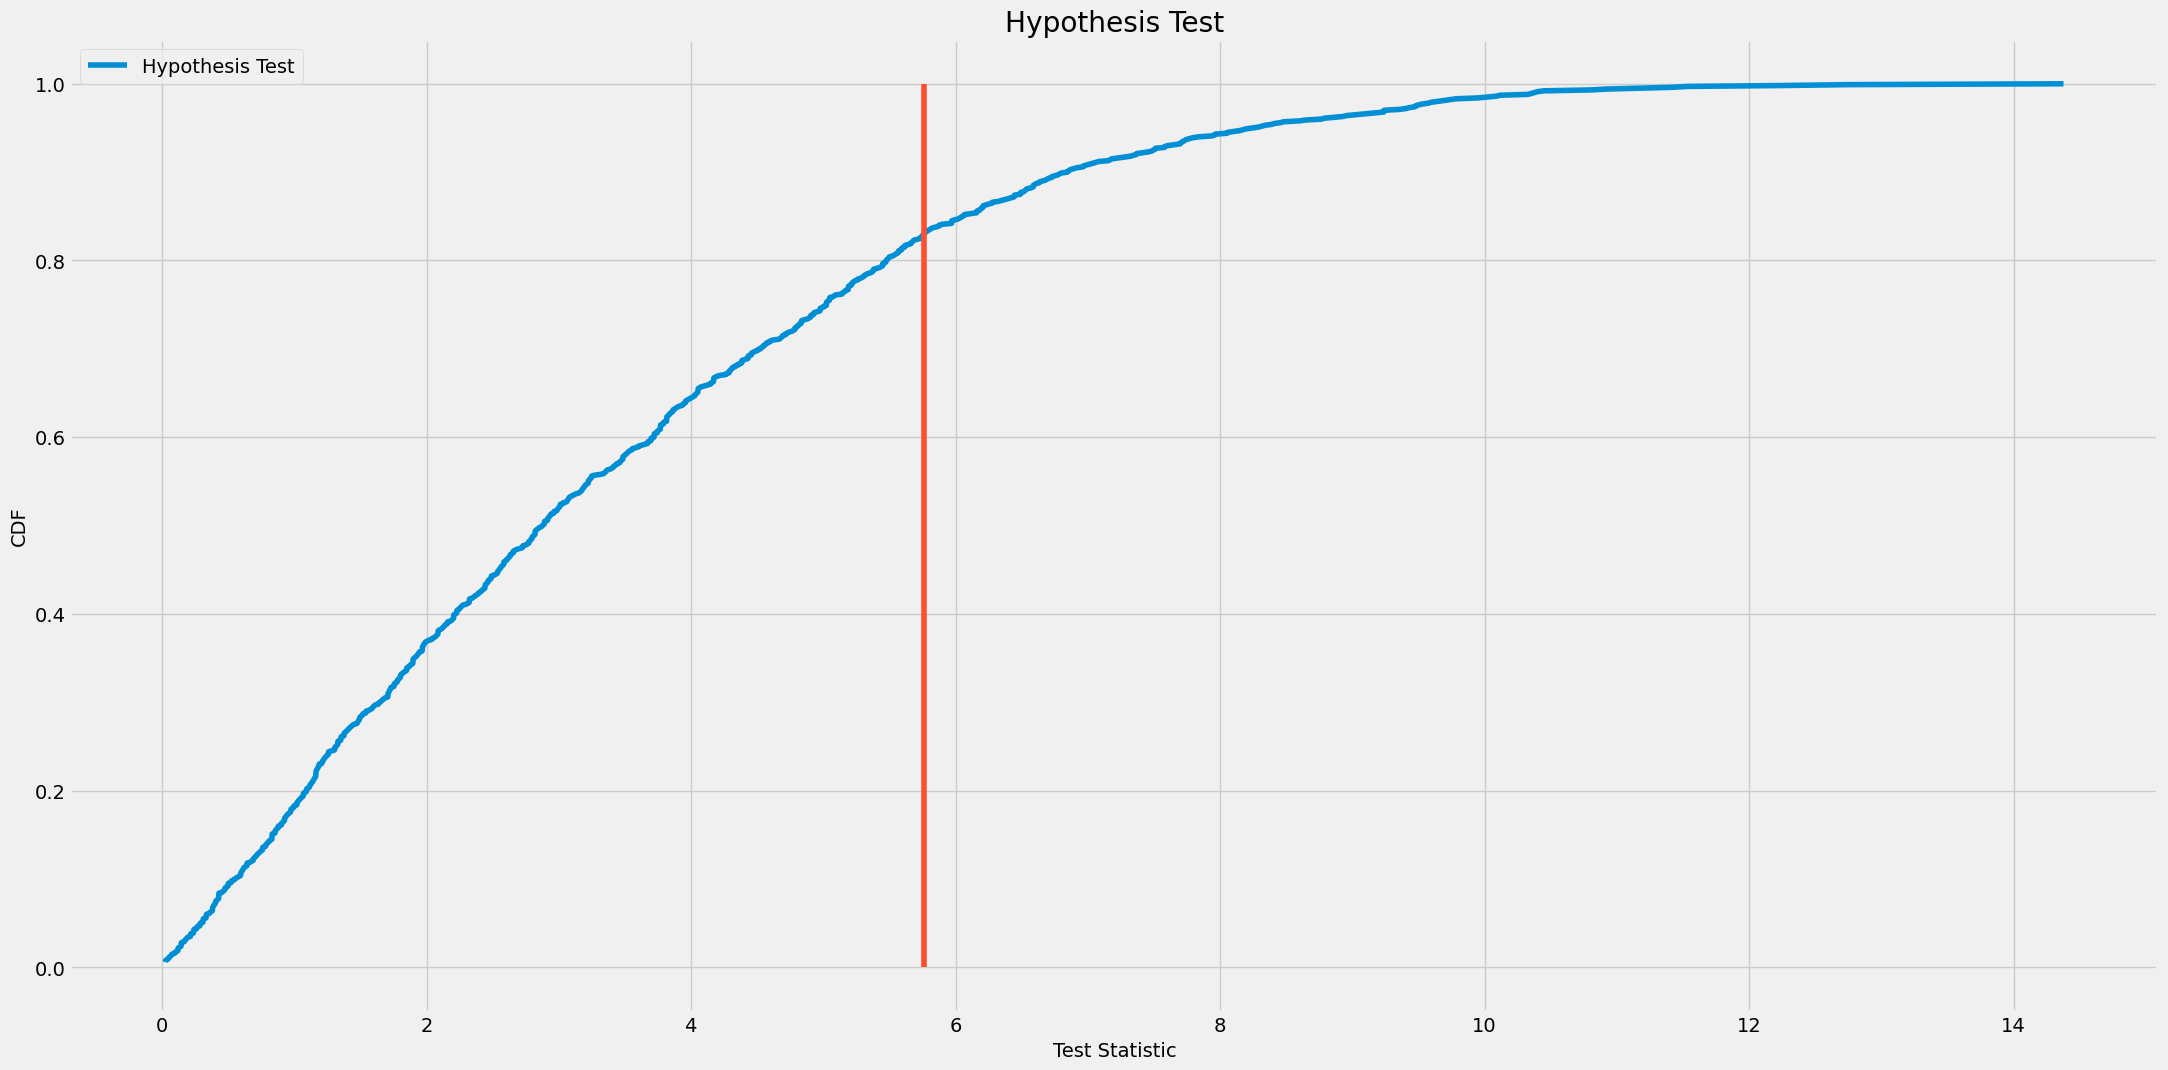

In [37]:
allKKScores = batsmanPerMatch[batsmanPerMatch.Batsman == "V Kohli"]
kkFirstInningsScores = allKKScores[allKKScores.InningNo == 1].TotalRuns.values
kkSecondInningsScores = allKKScores[allKKScores.InningNo == 2].TotalRuns.values
obs_diff = abs(kkFirstInningsScores.mean() - kkSecondInningsScores.mean())
print(f"Observer Difference:%0.2f" % obs_diff)

groups = kkFirstInningsScores, kkSecondInningsScores

ht = func_hypo_test.ClassicHypothesisTest(groups)
pv = ht.PValue()
print(f"PValue:%0.2f" % pv)


cdfHt, bin_edgesMi = func_pmfcdf.getCdf(ht.test_stats)

# Plot the cdf
plt.plot(bin_edgesMi[0:-1], cdfHt, label="Hypothesis Test")
plt.plot([obs_diff, obs_diff], [0, 1])
plt.title("Hypothesis Test")
plt.xlabel("Test Statistic")
plt.ylabel("CDF")
plt.legend()
plt.show()

The p-value ~0.16, derived inning difference scores is 5.76, i.e 16% of first inning scrore.</br> 
Not statistically significant and CDF interesects at 0.84, complement of the p-value 0.16.

## Regression Test - Logistic Regression <a class="anchor" id="Logistic-Regression"></a>
How different attributes impact winning.</br> Find Correlations for columns.

In [38]:
columnsNames = [
    "BattingTeam",
    "opposition",
    "City",
    "Chasing",
    "WonToss",
    "teamTotalRuns",
    "OpenersTotalRuns",
    "boundries",
    "firstSixTotal",
    "lastFiveTotal",
    "boundriesGiven",
    "firstSixTotalGiven",
    "lastFiveTotalGiven",
    "oppisitionTotalRuns",
]


for column in columnsNames:
    print("Correlation for:", column, " With Column Won")
    print(func_ccorelation.theils_u(inningsInfo.Won, inningsInfo[column]))

Correlation for: BattingTeam  With Column Won
0.0170829596509302
Correlation for: opposition  With Column Won
0.01823727482468467
Correlation for: City  With Column Won
0.0004147545228560061
Correlation for: Chasing  With Column Won
0.00838744106092168
Correlation for: WonToss  With Column Won
0.0013898995082461216
Correlation for: teamTotalRuns  With Column Won
0.15013965053024567
Correlation for: OpenersTotalRuns  With Column Won
0.15514479951661883
Correlation for: boundries  With Column Won
0.08113799579311623
Correlation for: firstSixTotal  With Column Won
0.07475507117224245
Correlation for: lastFiveTotal  With Column Won
0.061600569460932154
Correlation for: boundriesGiven  With Column Won
0.08034421364316711
Correlation for: firstSixTotalGiven  With Column Won
0.0743562304391498
Correlation for: lastFiveTotalGiven  With Column Won
0.06079928227100333
Correlation for: oppisitionTotalRuns  With Column Won
0.1477723753520669


Criteria to pick the columns (Correlation >= .10)</br>
> Following columns we will considered :</br>
    * teamTotalRuns</br>
    * OpenersTotalRuns</br>
    * oppositionTotalRuns</br>

## Fitting model  <a class="anchor" id="Fitting-model-with-all-data"></a>
Create model with all the data from innigns information dataframe with above columns.

In [39]:
inningsInfo["WonAsInt"] = inningsInfo.Won.astype("int")
formula = "WonAsInt ~ teamTotalRuns + OpenersTotalRuns + oppisitionTotalRuns"
model = smf.logit(formula, data=inningsInfo)

## Model Accuracy with Entire and Split Dataset   <a class="anchor" id="Model-Accuracy-with-all-data"></a>

In [40]:
def printModelAndAccuracy(regModel, testDataset):
    results = regModel.fit()
    print(results.params)
    endog = pd.DataFrame(regModel.endog, columns=[regModel.endog_names])
    exog = pd.DataFrame(regModel.exog, columns=regModel.exog_names)

    actual = testDataset["WonAsInt"]
    baseline = actual.mean()

    lengthTest = len(actual)
    predict = results.predict(testDataset) >= 0.5
    true_pos = predict * actual
    true_neg = (1 - predict) * (1 - actual)
    sumTp = sum(true_pos)
    sumTn = sum(true_neg)
    print(
        "True Positives:%0.0f \t True Negatives:%0.0f \t Length Test Dataset:%d"
        % (sumTp, sumTn, lengthTest)
    )
    acc = (sumTp + sumTn) / lengthTest
    print(f"Accuracy:%0.2f%%" % acc)


printModelAndAccuracy(model, inningsInfo)

Optimization terminated successfully.
         Current function value: 0.463738
         Iterations 8
Intercept              0.264526
teamTotalRuns          0.120727
OpenersTotalRuns       0.015821
oppisitionTotalRuns   -0.128434
dtype: float64
True Positives:628 	 True Negatives:671 	 Length Test Dataset:1504
Accuracy:0.86%


The Accuracy for model with same training and test dataset is 86 %

### Model fit with Splitting Training and Test Dataset 70-30%

In [41]:
modelDataset = pd.DataFrame.copy(inningsInfo)
trainingSet = modelDataset.sample(frac=0.70, random_state=0)
testSet = modelDataset.drop(trainingSet.index)

## Model Accuracy with split data <a class="anchor" id="Model-Accuracy-with-split-data"></a>
Create model by splitting data into 70-30 training dataset and test dataset from innigns information dataframe with above columns.

In [42]:
model = smf.logit(formula, data=trainingSet)
printModelAndAccuracy(model, testSet)

Optimization terminated successfully.
         Current function value: 0.473392
         Iterations 8
Intercept              0.143369
teamTotalRuns          0.113018
OpenersTotalRuns       0.014804
oppisitionTotalRuns   -0.119837
dtype: float64
True Positives:196 	 True Negatives:201 	 Length Test Dataset:451
Accuracy:0.88%


With splitting data into training and test dataset the accuracy is 88%

## Plot Histogram for Number of Matches Per Season <a class="anchor" id="Histogram-Matches-Per-Season"></a>

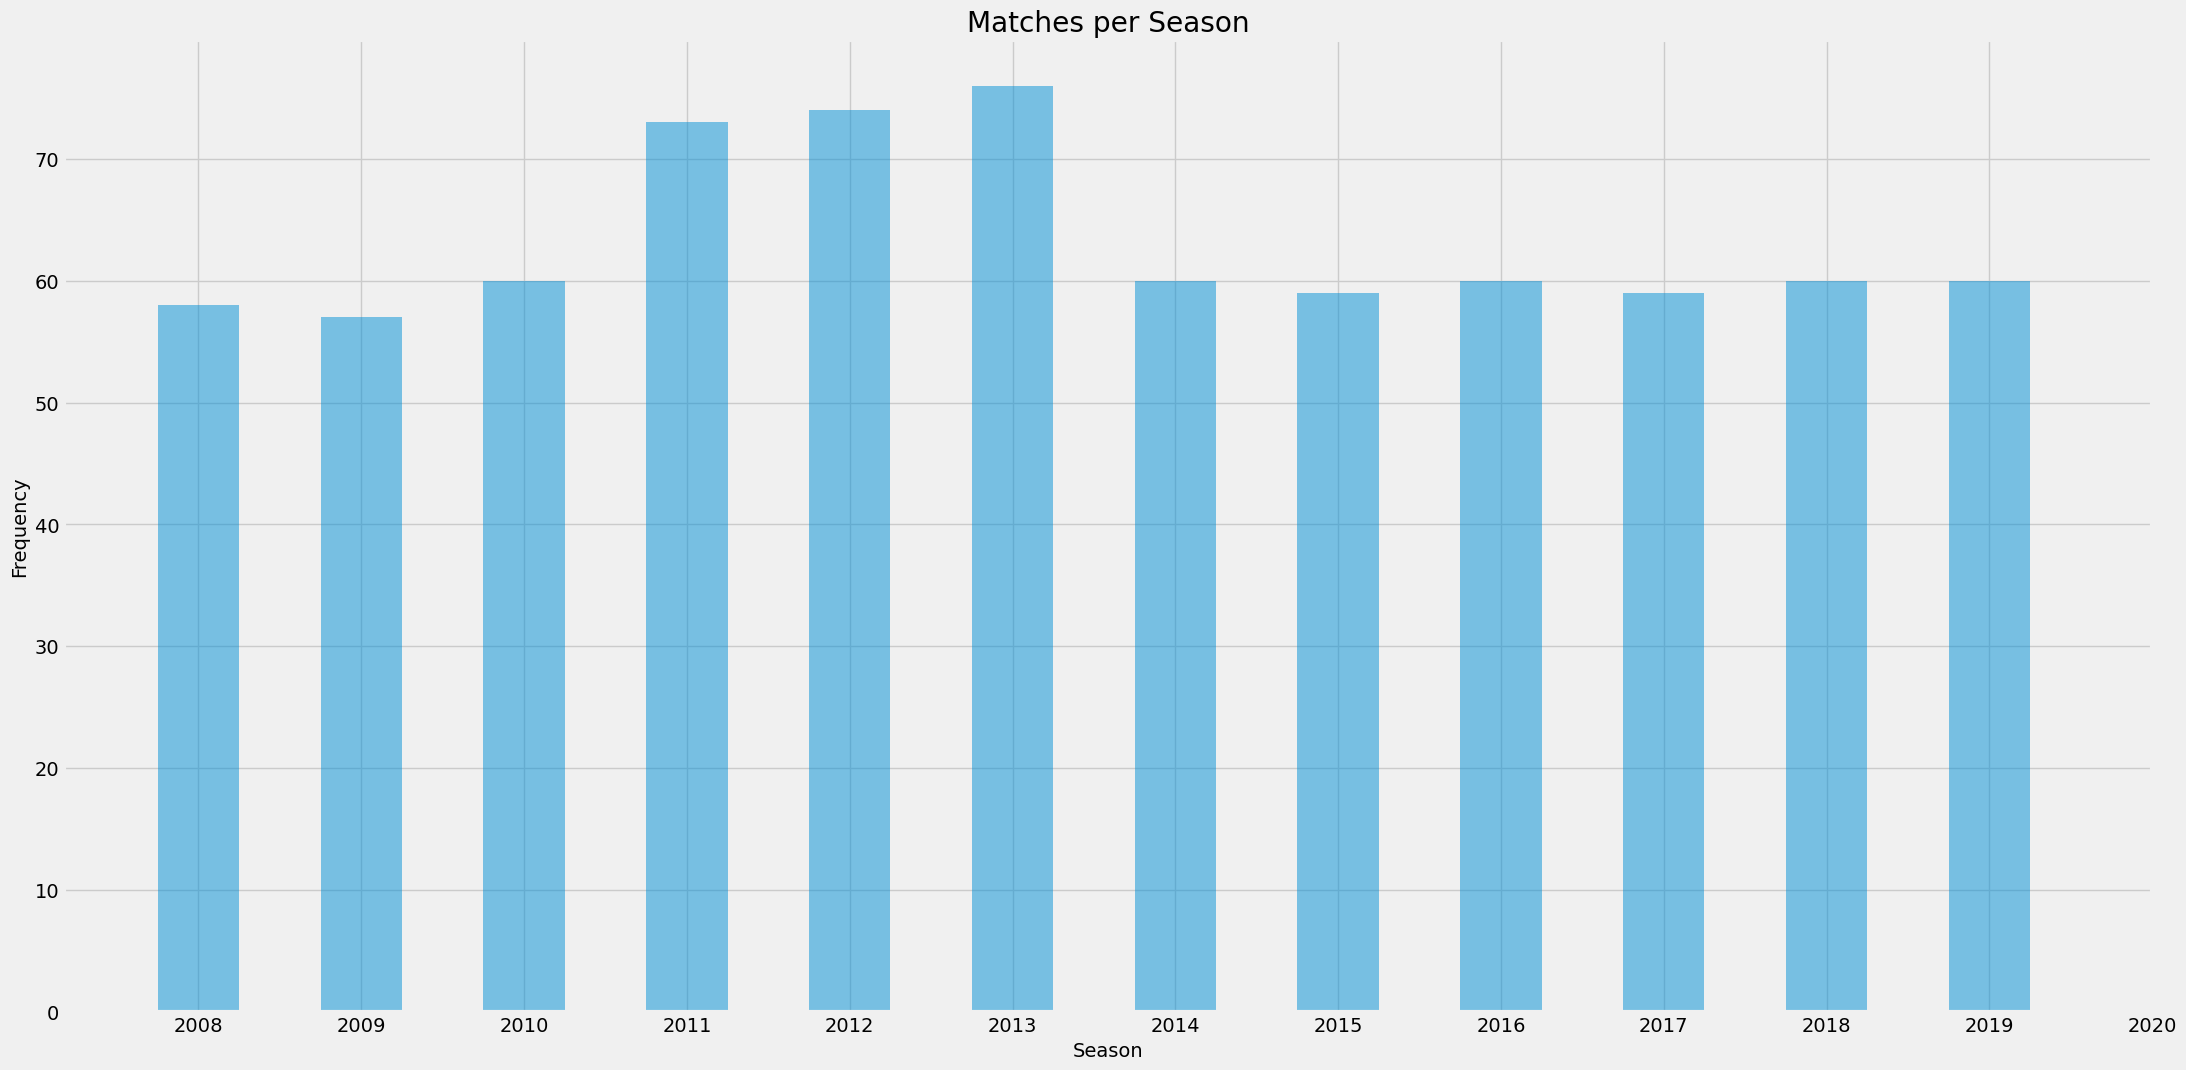

In [43]:
bins = list(range(2008, 2021))
plt.title("Matches per Season")
plt.hist(dfMatchInfo.IPL_Season, bins=bins, alpha=0.5, align="left", rwidth=0.5)
plt.xlabel("Season")
plt.ylabel("Frequency")
plt.xticks(ticks=bins)
plt.show()

## Plot Histogram for Number of Match Locations <a class="anchor" id="Histogram-Matches-Per-Location"></a>

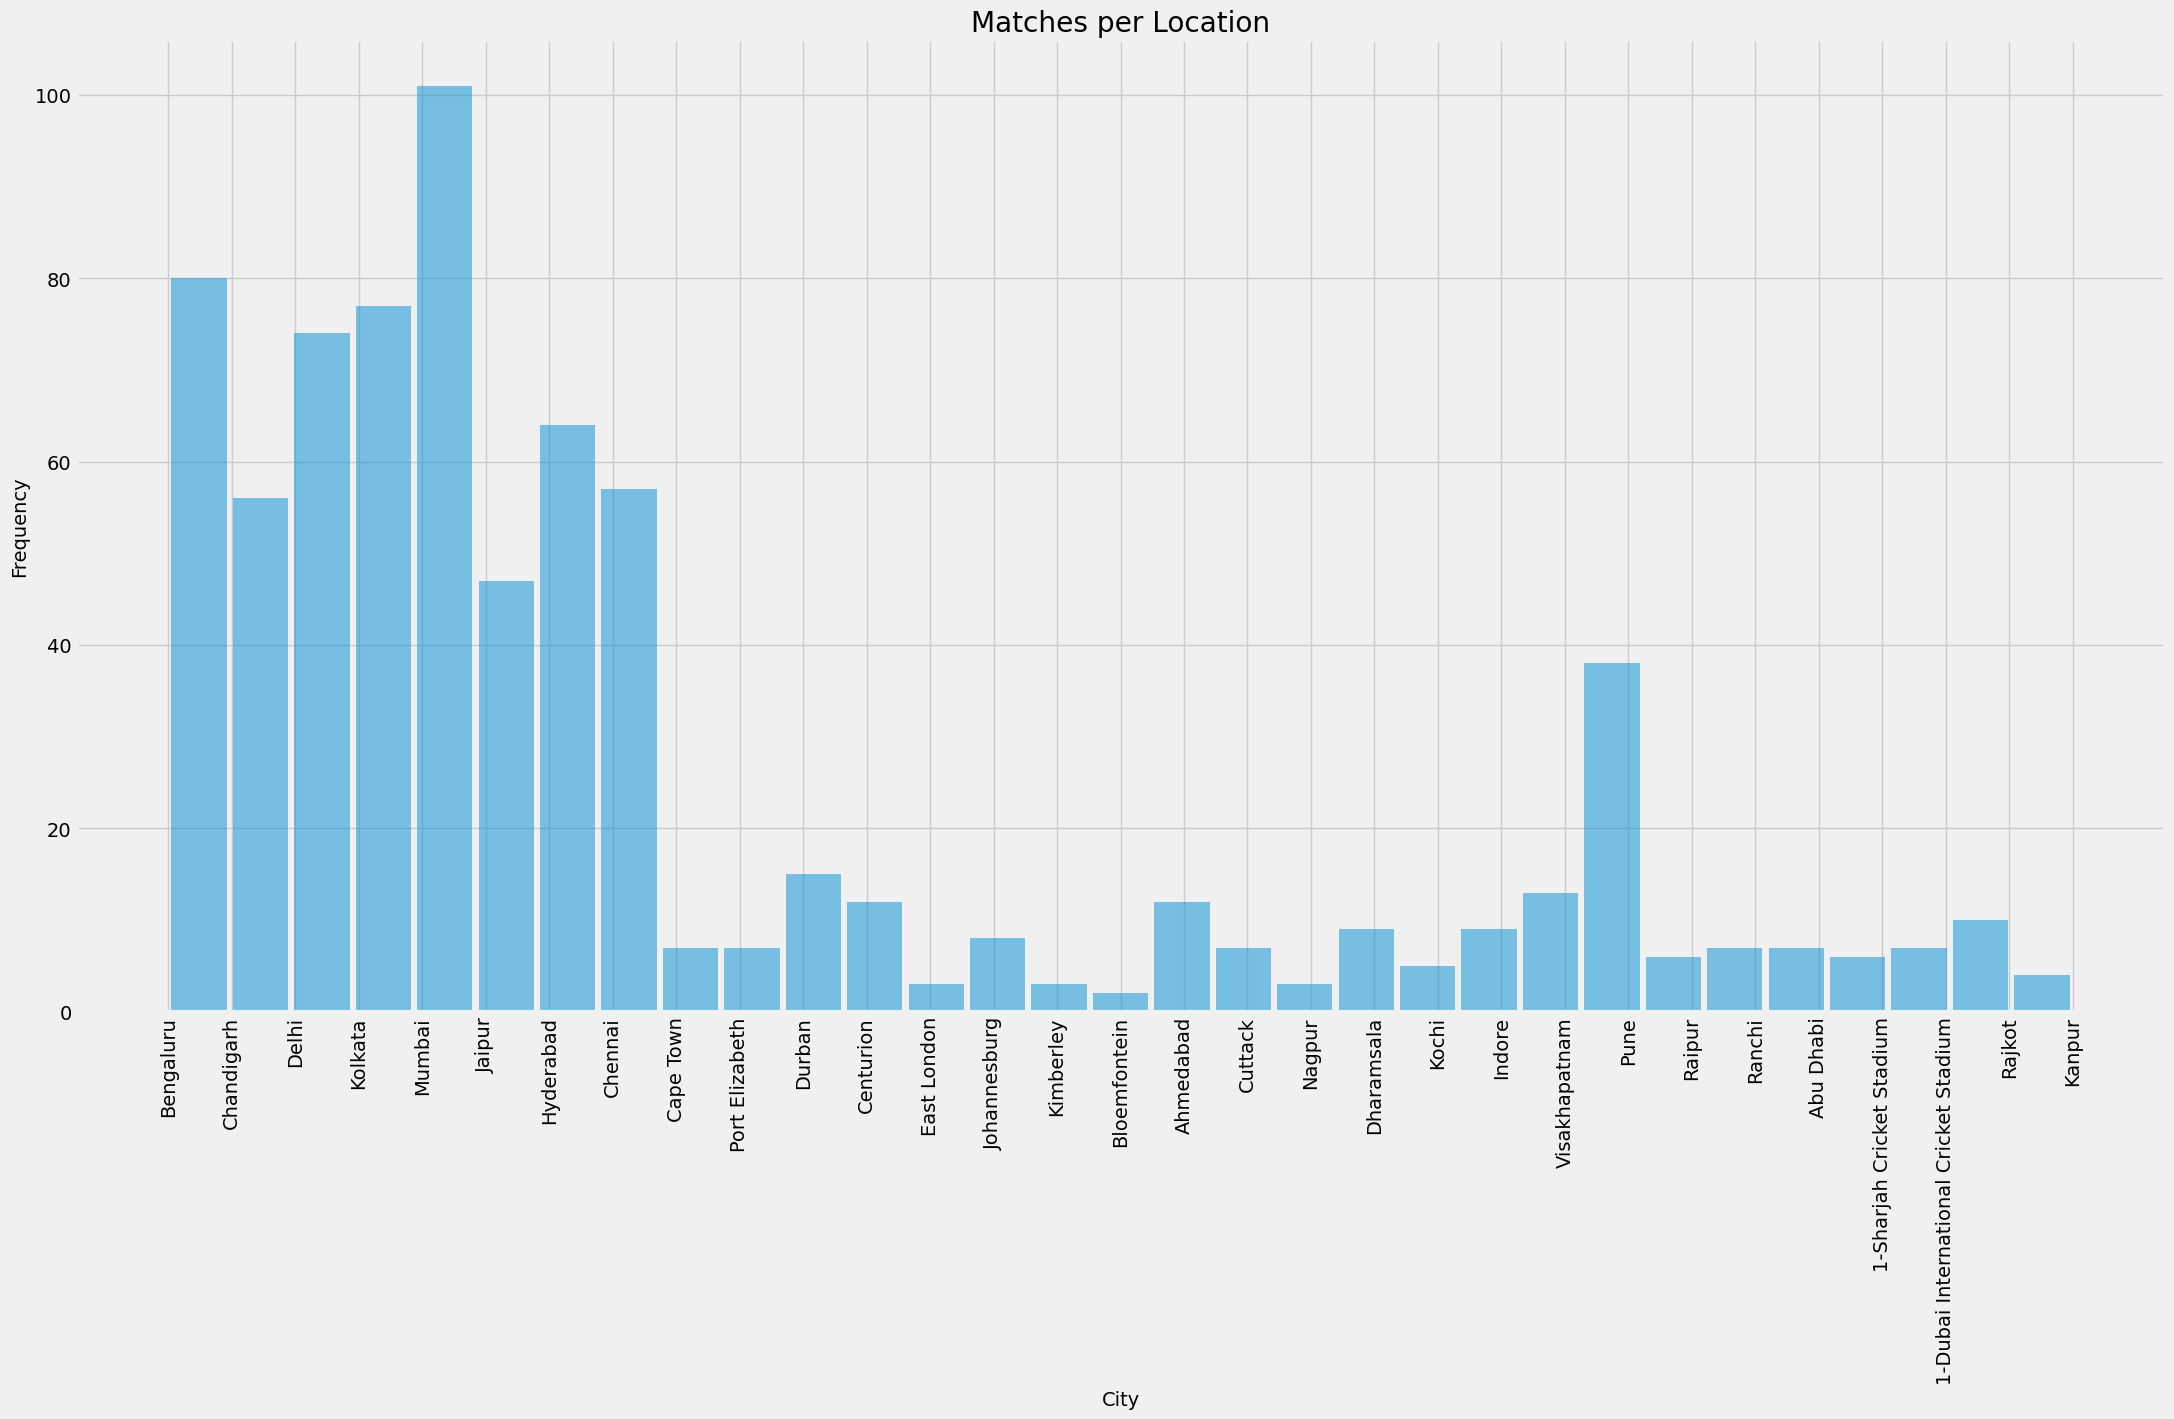

In [44]:
cities = len(dfMatchInfo.City.unique())
plt.title("Matches per Location")
plt.hist(dfMatchInfo.City, bins=cities, alpha=0.5, align="mid", rwidth=0.9)
plt.xlabel("City")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()

## Plot Histogram for Toss <a class="anchor" id="Histogram-For-Toss-Winners"></a>

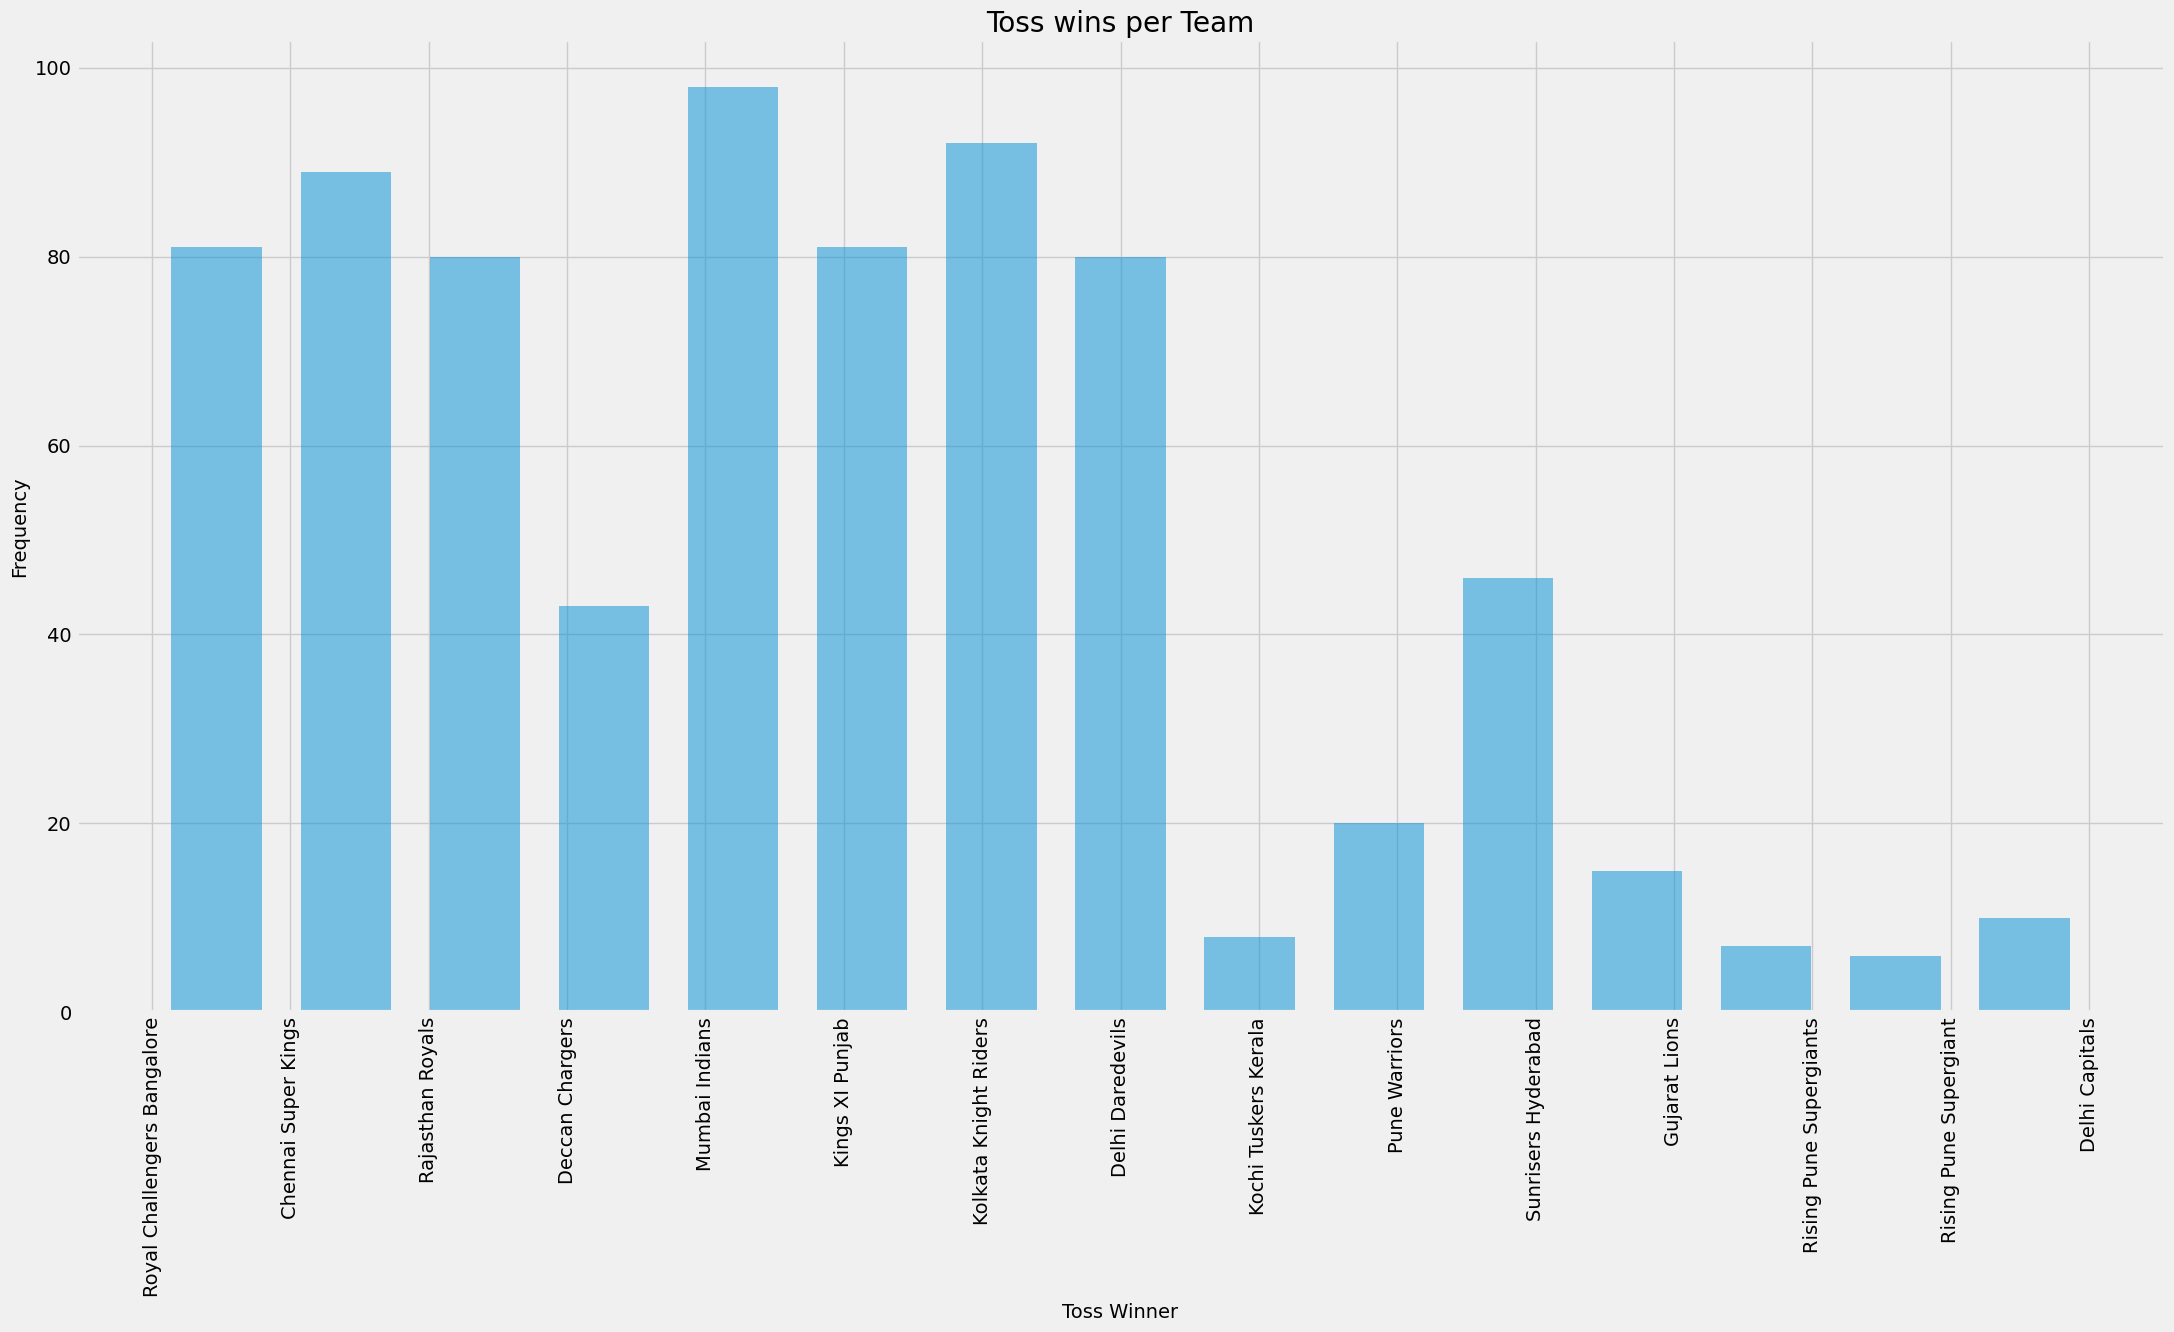

In [45]:
bins = len(dfMatchInfo.TossWinner.unique())
plt.title("Toss wins per Team")
plt.hist(
    dfMatchInfo.TossWinner, bins=bins, alpha=0.5, align="mid", rwidth=0.7,
)
plt.xlabel("Toss Winner")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()

## Plot Histogram for Match Winners <a class="anchor" id="Histogram-For-Match-Winners"></a>

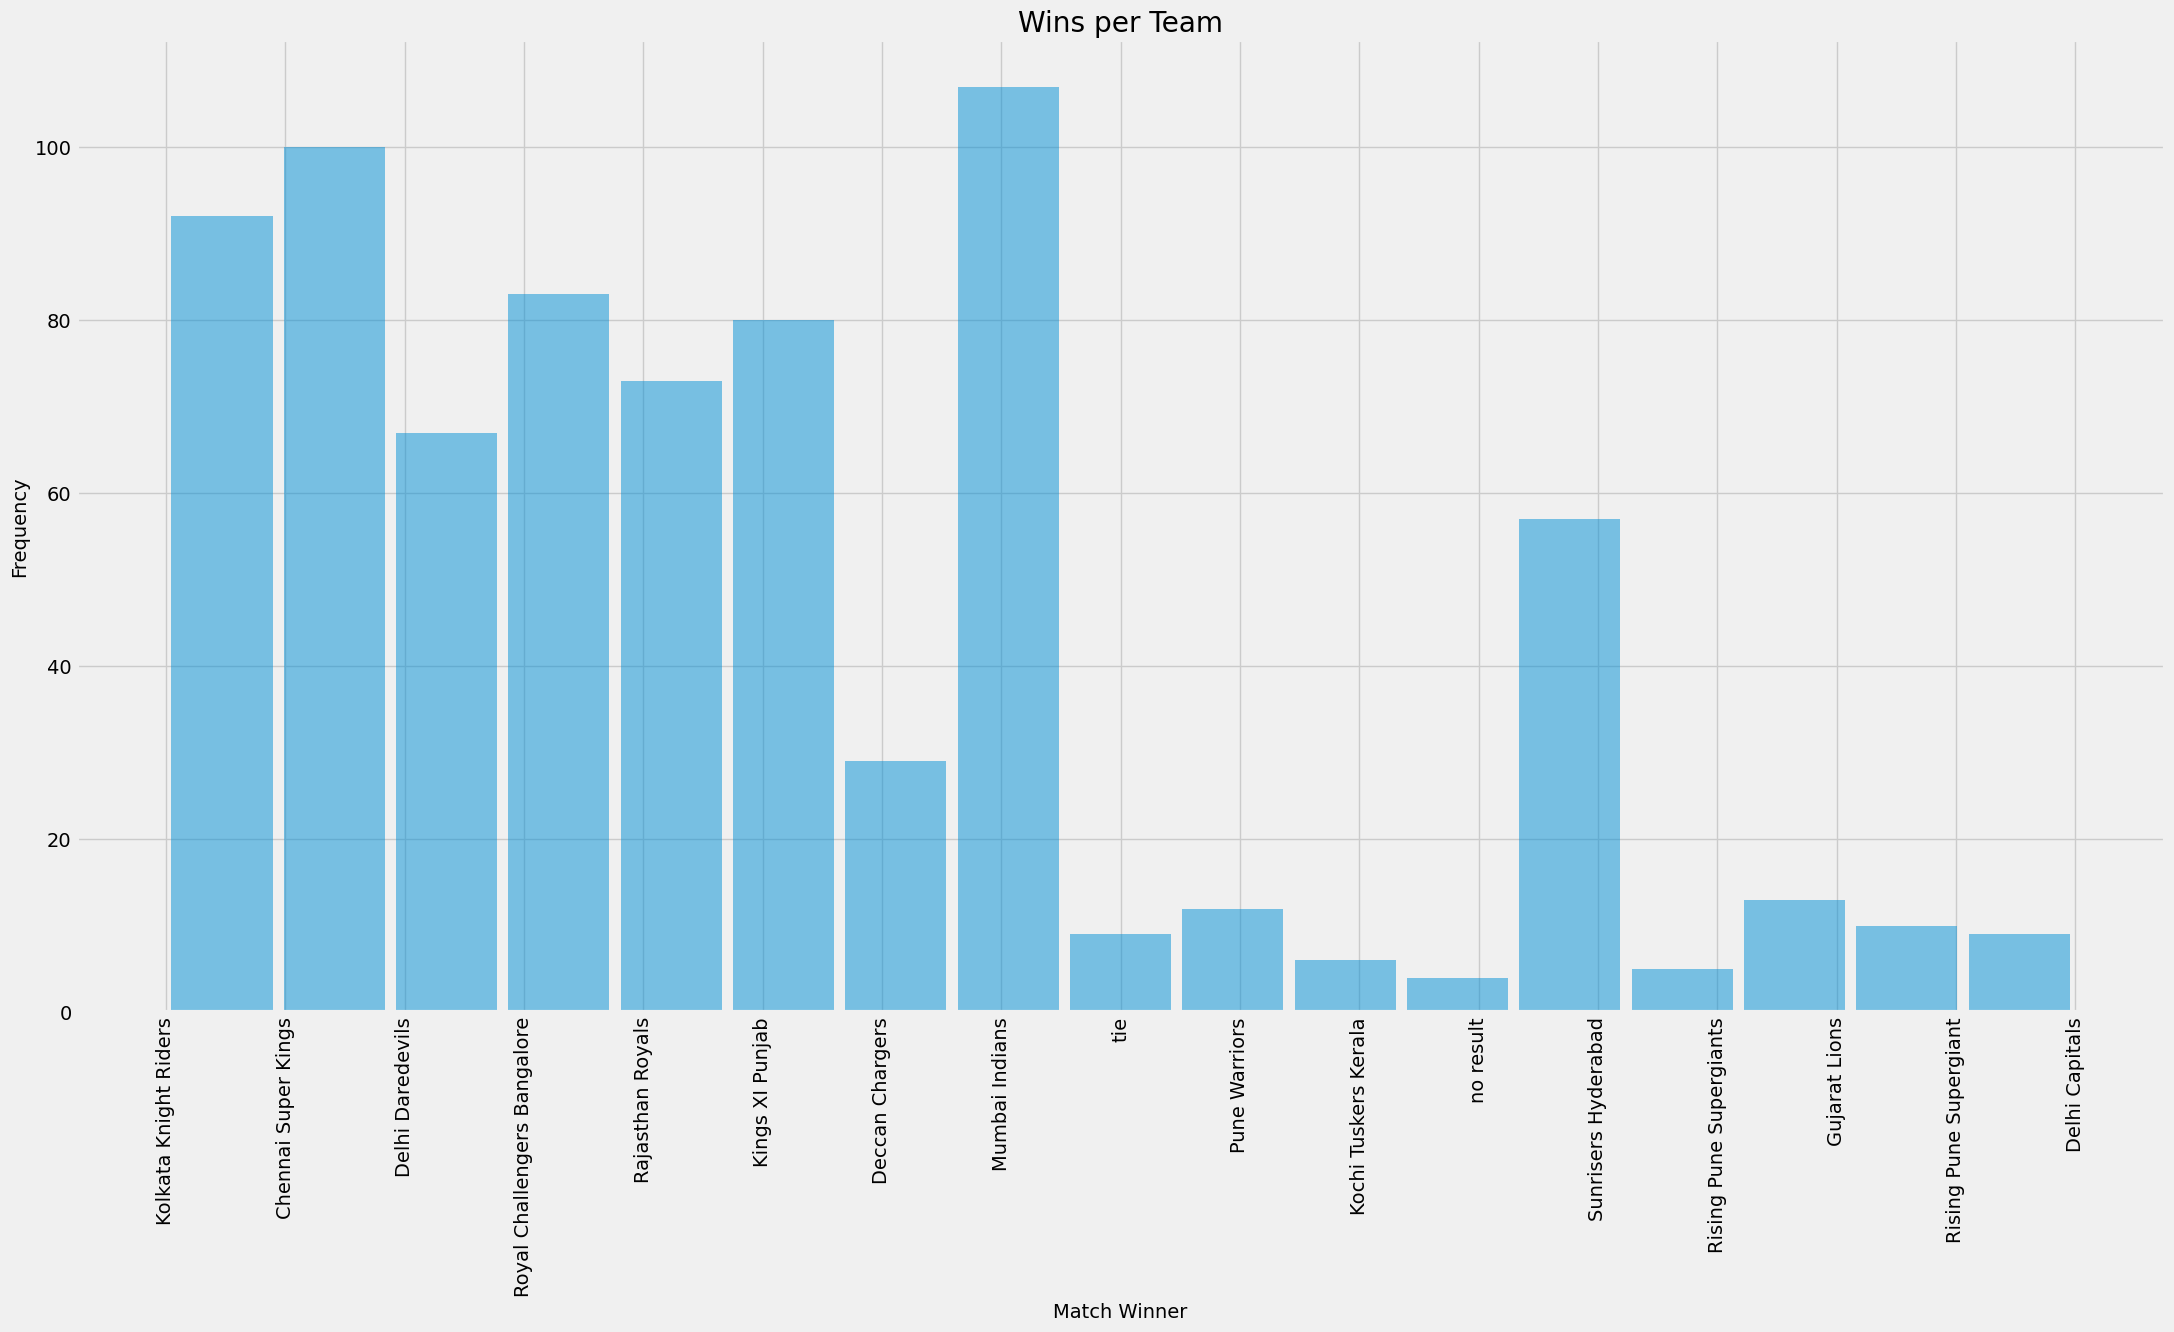

In [46]:
bins = len(dfMatchInfo.Winner.unique())
plt.title("Wins per Team")
plt.hist(dfMatchInfo.Winner, bins=bins, alpha=0.5, rwidth=0.9)
plt.xlabel("Match Winner",)
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()

## Plot Histogram for Man of the Match <a class="anchor" id="Histogram-For-Man-of-the-Match"></a>

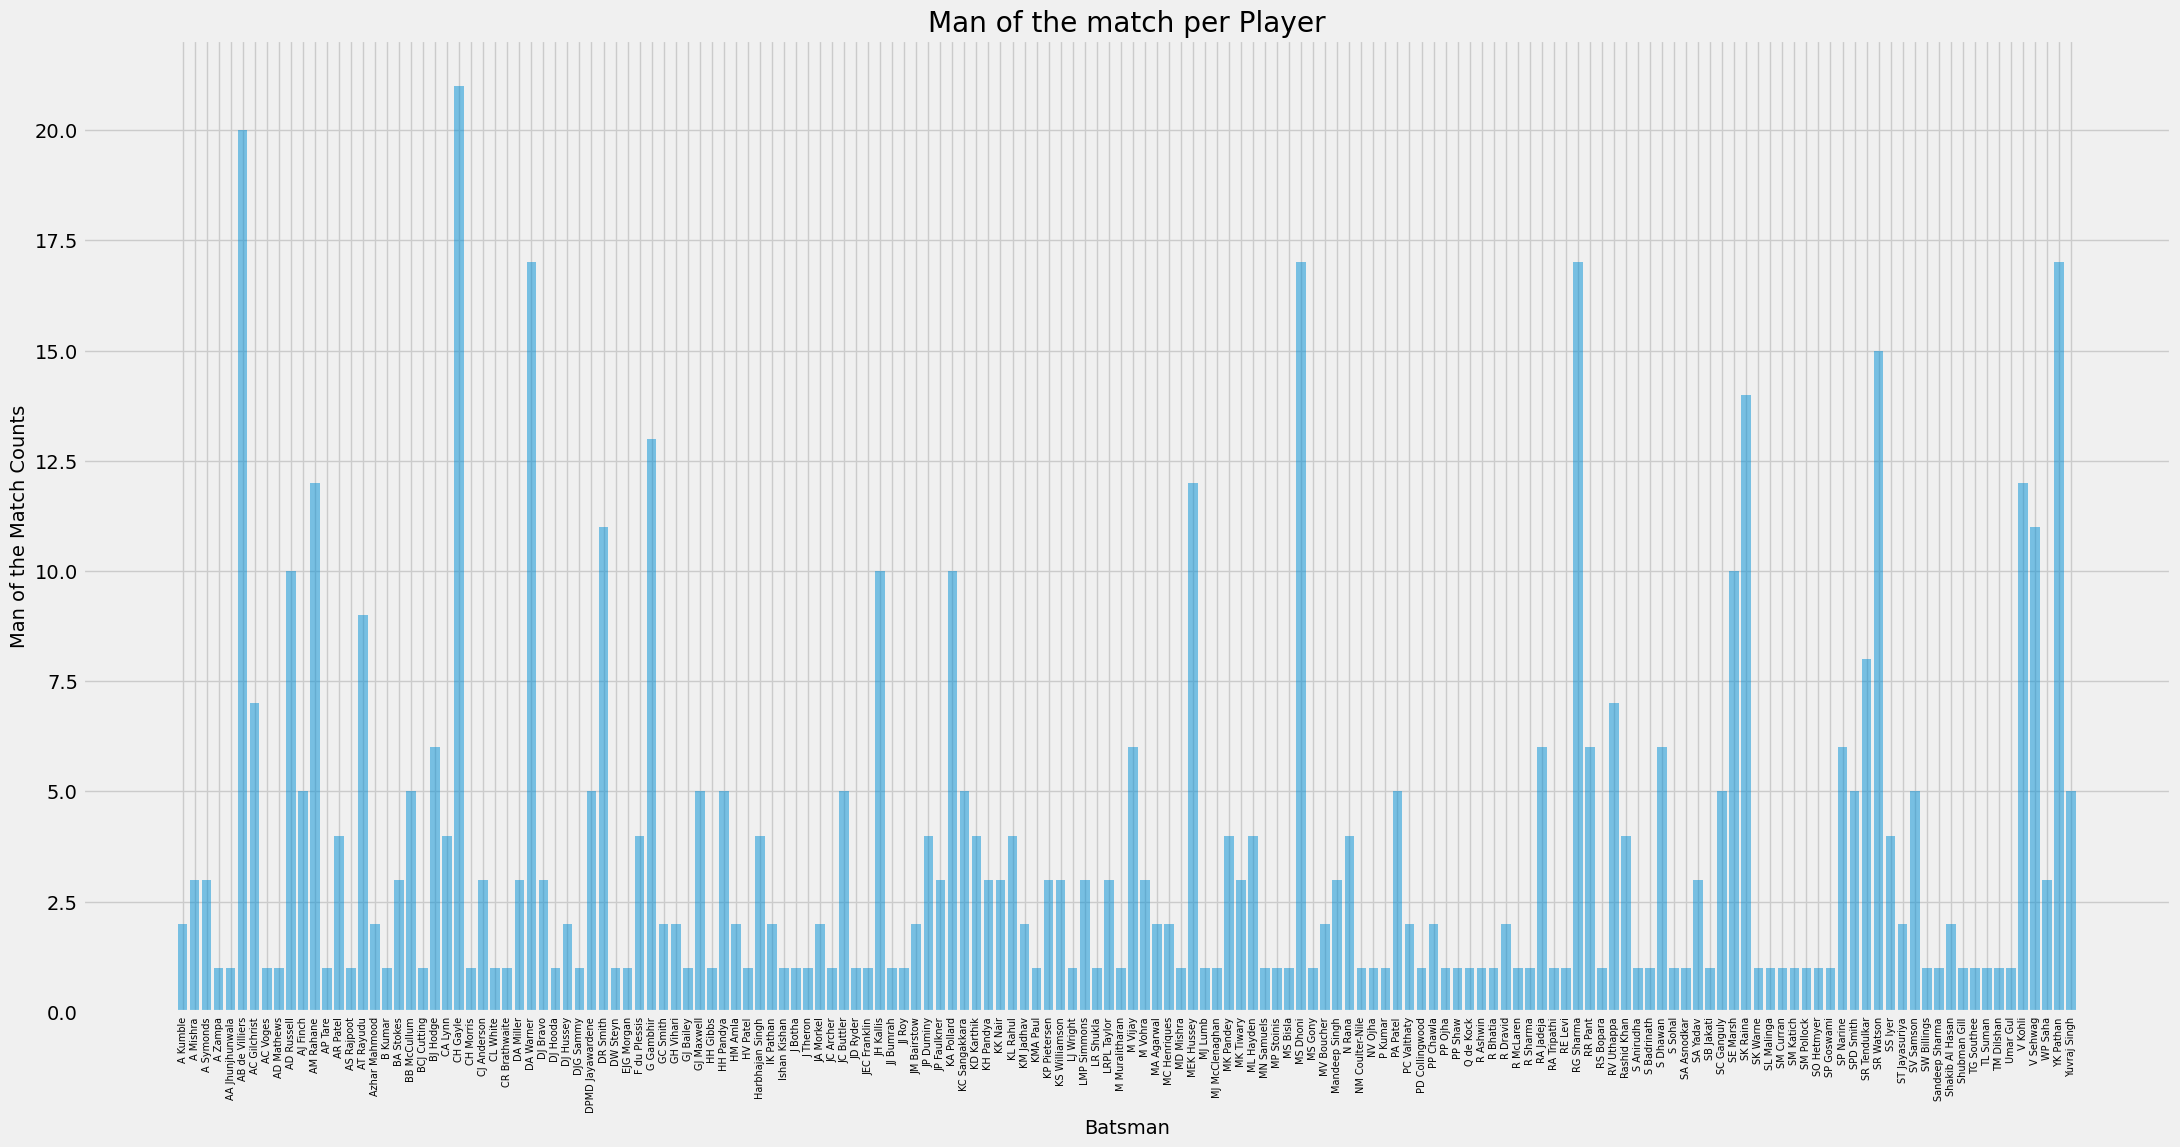

In [47]:
moms = batsmanAllSeason[batsmanAllSeason["ManOfTheMatch"] > 0]
bins = len(moms)
plt.title("Man of the match per Player")
plt.bar(x=moms.index, height=moms["ManOfTheMatch"], alpha=0.5)
plt.xlabel("Batsman",)
plt.xticks(rotation=90, fontsize=7)
plt.ylabel("Man of the Match Counts")
plt.show()

## Plot Histogram for Centuries by Players <a class="anchor" id="Histogram-No-of-centuries-by-players"></a>

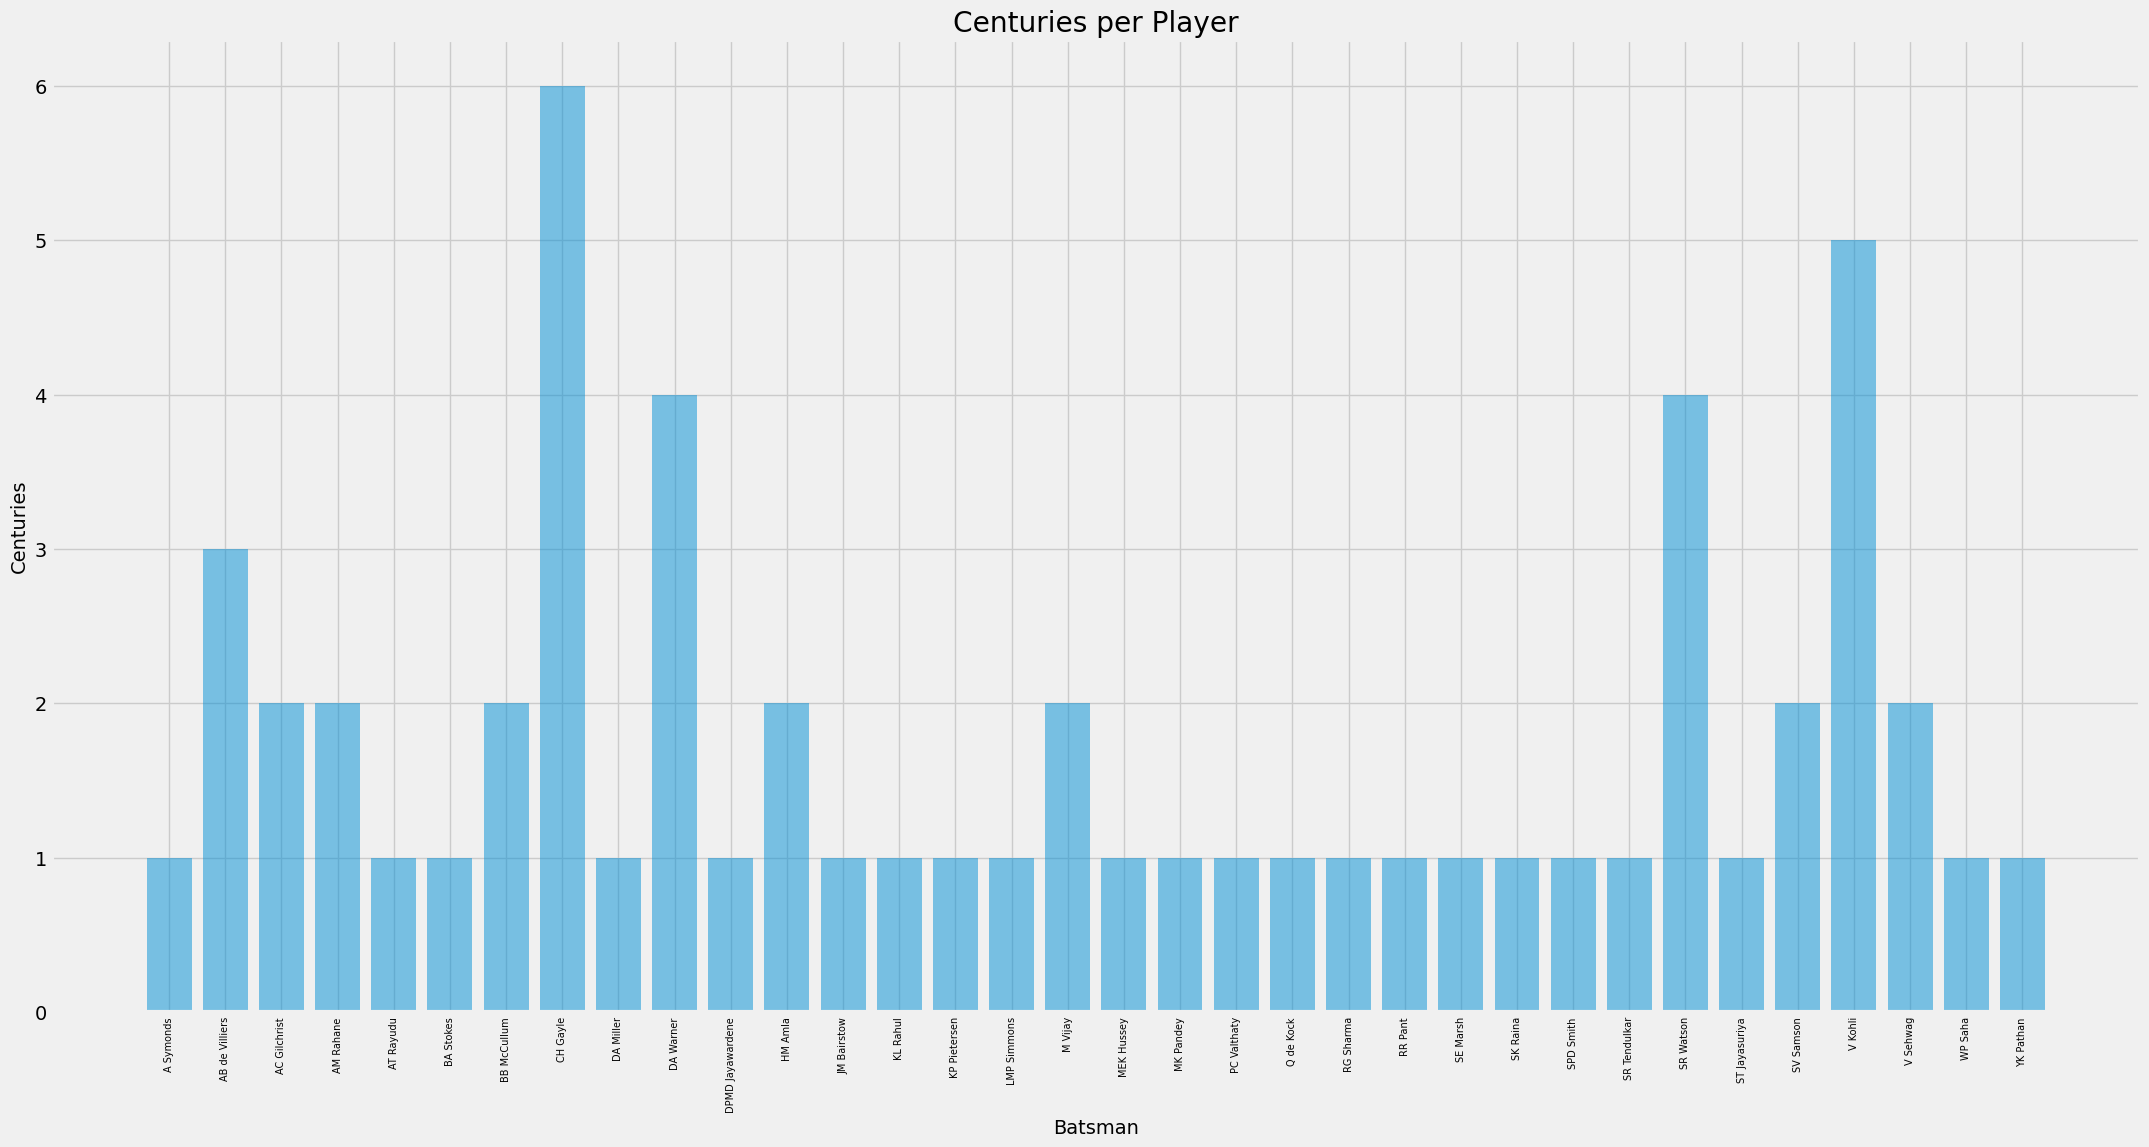

In [48]:
centuries = batsmanAllSeason[batsmanAllSeason["Century"] > 0]
bins = len(centuries)
plt.title("Centuries per Player")
plt.bar(x=centuries.index, height=centuries["Century"], alpha=0.5)
plt.xlabel("Batsman",)
plt.xticks(rotation=90, fontsize=7)
plt.ylabel("Centuries")
plt.show()

## Plot Histogram for Half Centuries by Players <a class="anchor" id="Histogram-No-of-half-centuries-by-players"></a>

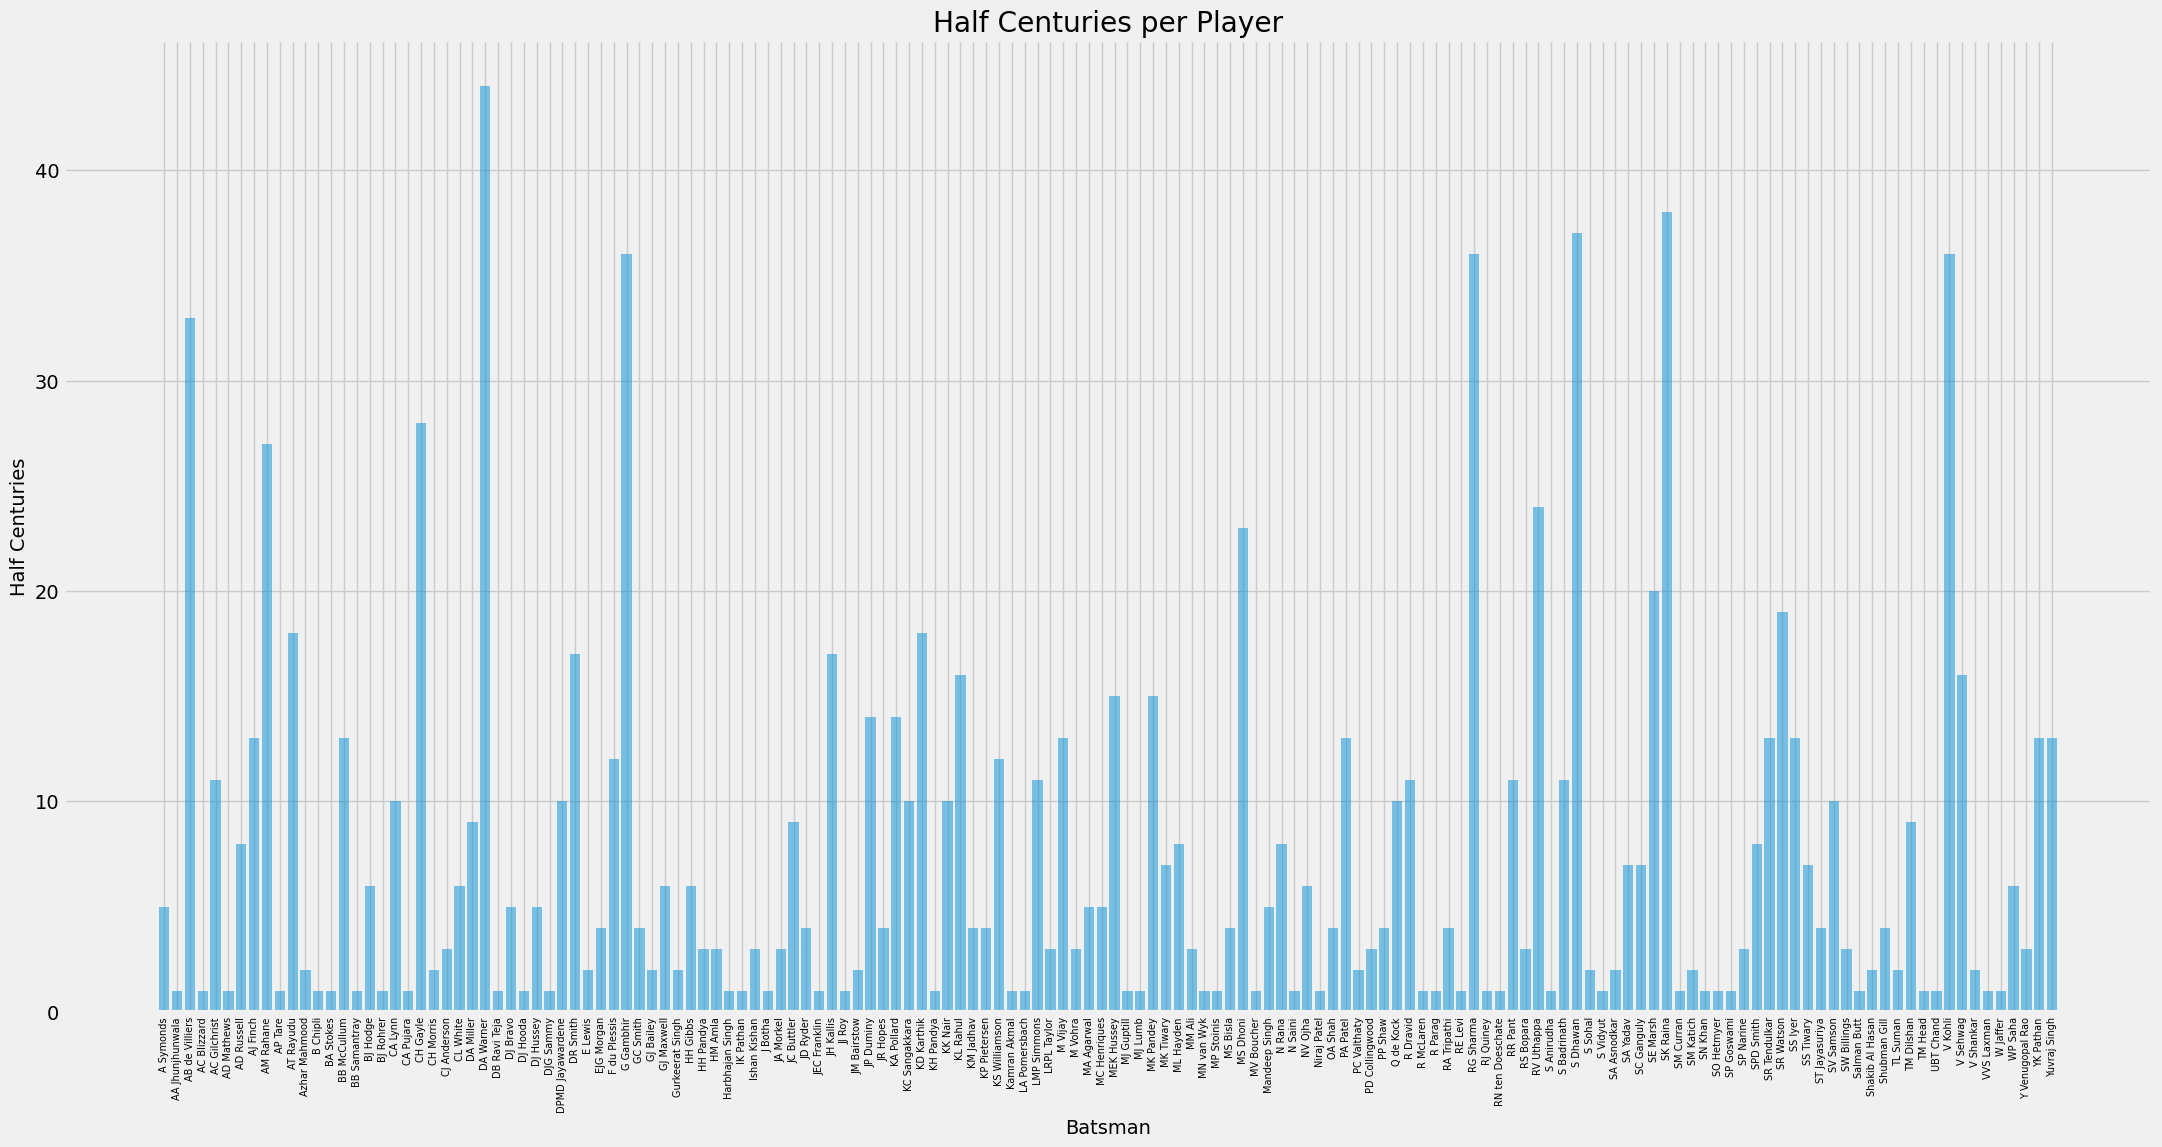

In [49]:
halfCenturies = batsmanAllSeason[batsmanAllSeason["HalfCentury"] > 0]
bins = len(halfCenturies)
plt.title("Half Centuries per Player")
plt.bar(
    x=halfCenturies.index, height=halfCenturies["HalfCentury"], alpha=0.5,
)
plt.xlabel("Batsman",)
plt.xticks(rotation=90, fontsize=7)
plt.ylabel("Half Centuries")
plt.show()

## Plot Histogram for Batsman Strike Rate <a class="anchor" id="Histogram-for-Strike-Rates-by-Batsman"></a>
Strike Rates with > 50 and total runs > 300

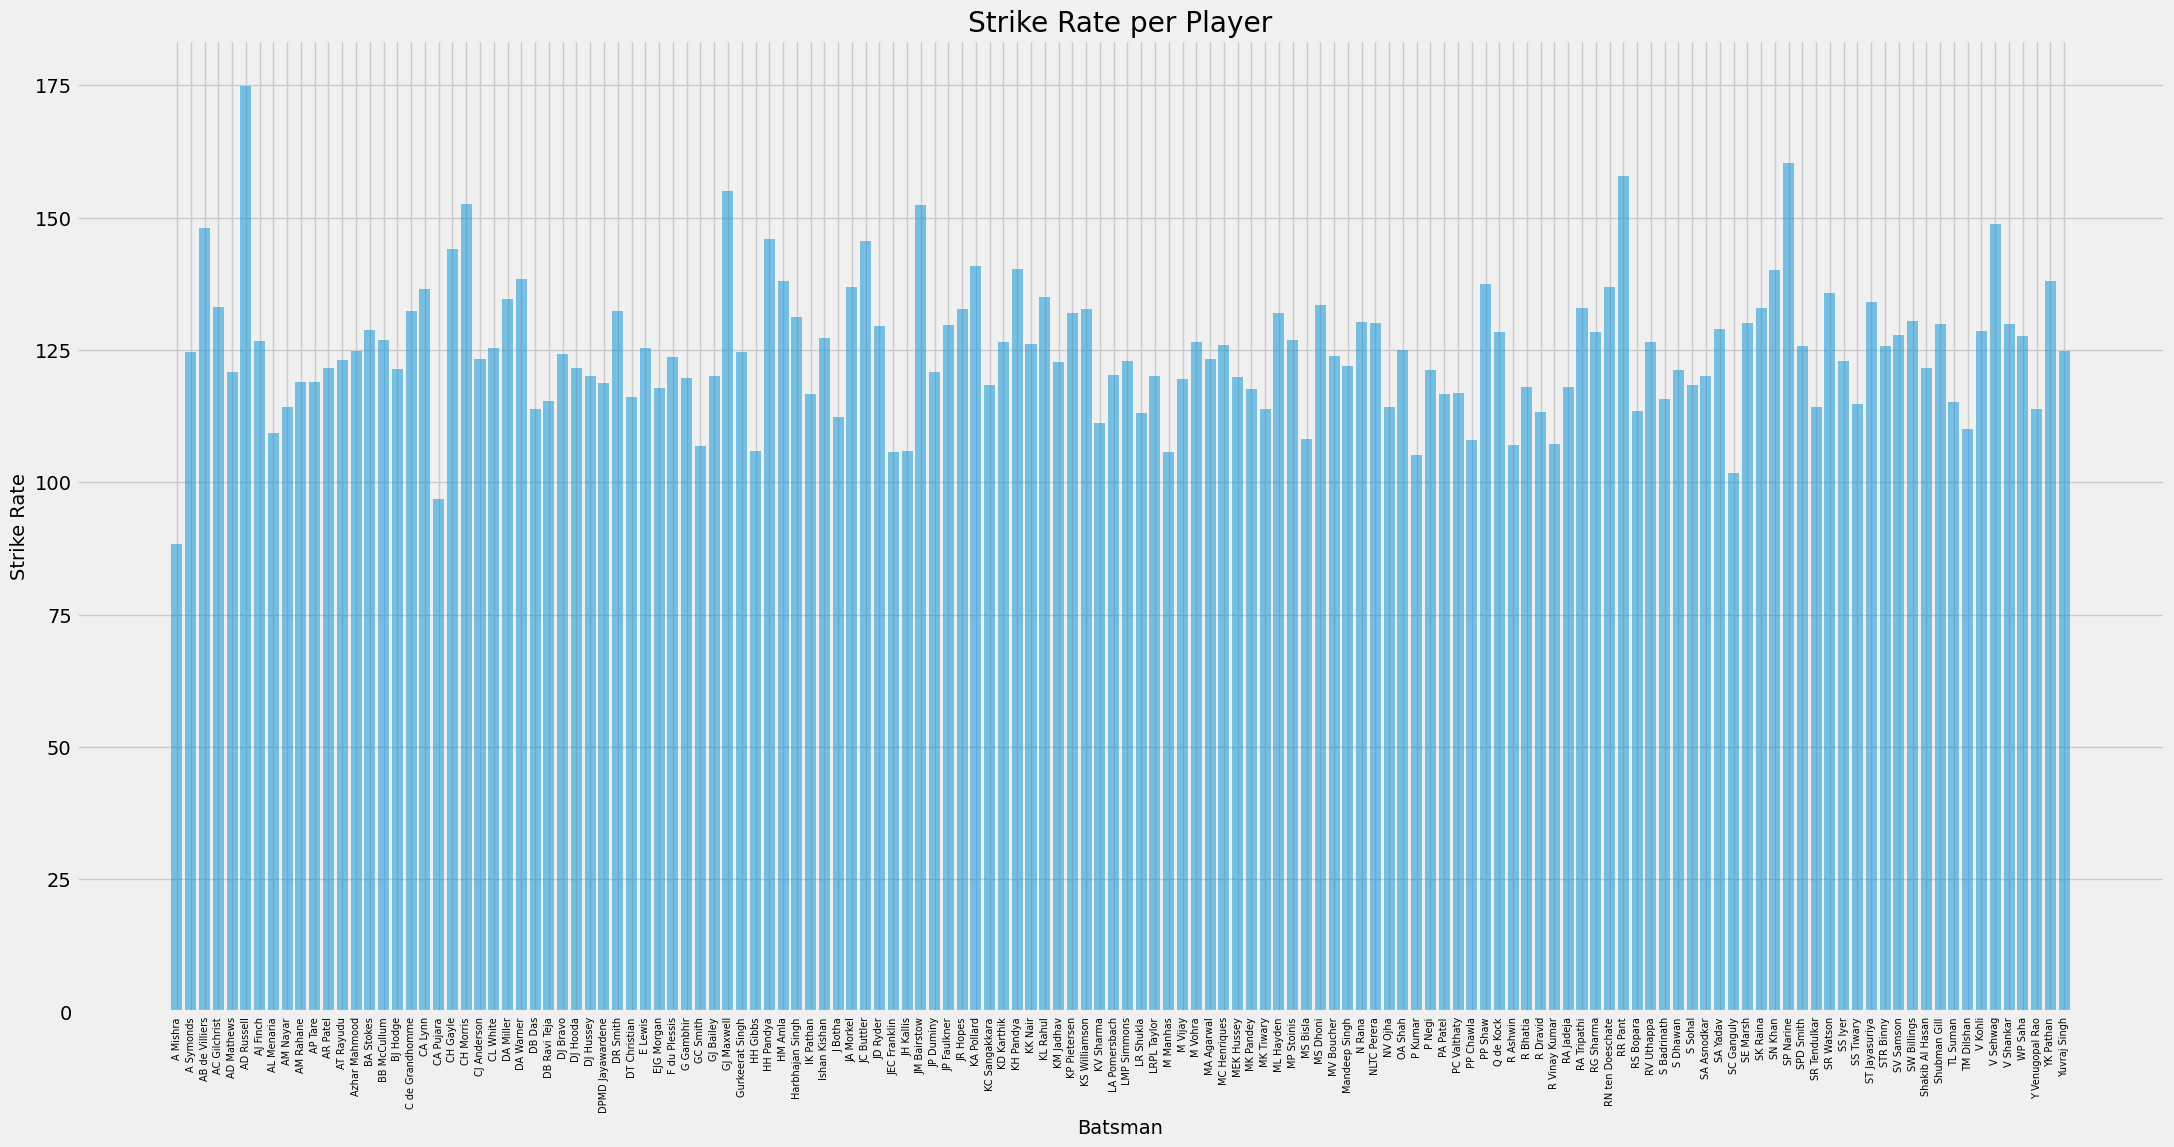

In [50]:
strkRate = batsmanAllSeason[
    (batsmanAllSeason["StrikeRate"] > 80) & (batsmanAllSeason["TotalRuns"] > 300)
]
bins = len(strkRate)
plt.title("Strike Rate per Player")
plt.bar(
    x=strkRate.index, height=strkRate["StrikeRate"], alpha=0.5,
)

plt.xlabel("Batsman",)
plt.xticks(rotation=90, fontsize=7)
plt.ylabel("Strike Rate")
plt.show()